In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
%matplotlib inline

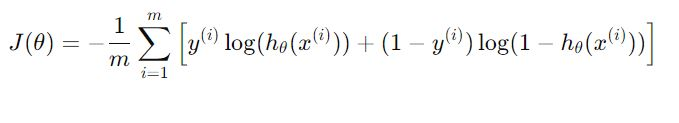

In [ ]:
def sigmoid(z):
    """
    Compute the sigmoid function.
    """
    return 1 / (1 + np.exp(-z))

def compute_cost(X, y, theta):
    """
    Compute the cost function for logistic regression.
    """
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    
    # Compute the cost for positive and negative examples separately
    cost_positive = -y * np.log(h)
    cost_negative = -(1 - y) * np.log(1 - h)
    
    # Compute the total cost
    total_cost = (1 / m) * np.sum(cost_positive + cost_negative)
    
    return total_cost

In [103]:
X = np.linspace(0,20)
X

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [104]:
a=-1
b=2
y=a*X+b
y

array([  2.        ,   1.59183673,   1.18367347,   0.7755102 ,
         0.36734694,  -0.04081633,  -0.44897959,  -0.85714286,
        -1.26530612,  -1.67346939,  -2.08163265,  -2.48979592,
        -2.89795918,  -3.30612245,  -3.71428571,  -4.12244898,
        -4.53061224,  -4.93877551,  -5.34693878,  -5.75510204,
        -6.16326531,  -6.57142857,  -6.97959184,  -7.3877551 ,
        -7.79591837,  -8.20408163,  -8.6122449 ,  -9.02040816,
        -9.42857143,  -9.83673469, -10.24489796, -10.65306122,
       -11.06122449, -11.46938776, -11.87755102, -12.28571429,
       -12.69387755, -13.10204082, -13.51020408, -13.91836735,
       -14.32653061, -14.73469388, -15.14285714, -15.55102041,
       -15.95918367, -16.36734694, -16.7755102 , -17.18367347,
       -17.59183673, -18.        ])

In [105]:
X = X.reshape(-1,1)

In [106]:
y = y.reshape(-1,1)

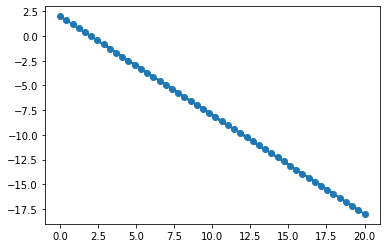

In [18]:
plt.plot(X,y)
plt.scatter(X,y)

# Adagrad

# 1 - Adagrad batch

In [39]:
def lr_batch1_adagrad(X , y , lr , eps,  maxnum ):
    theta_0 = 0
    theta_1 = 0
    loss = np.array([])
    thetas0=np.array([0])
    thetas1=np.array([0])
    hs=np.empty((0,50))
    vhistory_0 = 0
    vhistory_1 = 0

    for i in range(maxnum):


        print('**********iteration ' , i , '************')
        h = theta_0 + theta_1*X
        print("h(x): " , h)
        #print(h.shape)
        
        hs = np.vstack((hs , h.T))

        error = (h-y)
        print("error vector: " ,error )

        cost = (np.linalg.norm(h-y))**2/(2*len(h))
        print('j = ' , cost)
        loss = np.append(loss,cost)

        d_theta_0 =  sum(error)/len(error)
        d_theta_1 =  (sum(error*X)/len(error))
        
        
        gradient_vector = np.array([d_theta_0 ,d_theta_1])
        print("Gradient Vector:" , gradient_vector)

        gradient_vector_norm= np.linalg.norm(gradient_vector)
        print("gradient_vector_norm:" , gradient_vector_norm)
        
        

        if gradient_vector_norm < 0.001:
            break
            
        if i!=0 and (np.abs(loss[-1] - loss[-2]) < 0.0001) :
            break
        
        vhistory_0 = vhistory_0 + (d_theta_0)**2
        vhistory_1 = vhistory_1 + (d_theta_1)**2
        
        theta_0 = theta_0 - (lr/(np.sqrt(vhistory_0)+eps))*d_theta_0

        theta_1 = theta_1 - (lr/(np.sqrt(vhistory_1)+eps))*d_theta_1
        
        if(i != maxnum-1):        
            thetas0 = np.append(thetas0 , theta_0)
            thetas1 = np.append(thetas1 , theta_1)

        print("theta_0_new : " , theta_0)
        print("theta_1_new : " , theta_1)
    
    #print(hs.shape)
        
    return thetas0,thetas1,loss,hs,thetas0[-1],thetas1[-1]
    

In [40]:
thetas0 , thetas1 , loss , preds , theta0_opt , theta1_opt = lr_batch1_adagrad(X , y , 0.05 , 1e-08,  500 )

**********iteration  0 ************
h(x):  [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
error vector:  [[ 0.44897959]
 [ 5.34693878]
 [17.18367347]
 [12.28571429]
 [ 6.57142857]
 [ 2.48979592]
 [17.59183673]
 [ 2.08163265]
 [ 9.42857143]
 [14.32653061]
 [ 2.89795918]
 [ 3.71428571]
 [10.65306122]
 [-0.7755102 ]
 [ 7.79591837]
 [13.10204082]
 [ 4.93877551]
 [13.51020408]
 [13.91836735]
 [ 9.83673469]
 [ 8.20408163]
 [ 4.53061224]
 [-1.18367347]
 [10.24489796]
 [ 6.97959184]
 [ 1.26530612]
 [ 0.85714286]
 [16.36734694]
 [15.95918367]
 [ 0.04081633]
 [12.69387755]
 [ 9.02040816]
 [ 3.30612245]
 [15.14285714]
 [-0.36734694]
 [16.7755102 ]
 [18.        ]
 [ 5.75510204]
 [11.46938776]
 [-1.59183673]
 [-2.        ]
 [ 4.12244898]
 [ 6.163265

theta_1_new :  [-0.5944357]
**********iteration  72 ************
h(x):  [[ -2.02152274]
 [ -4.93304455]
 [-11.96922227]
 [ -9.05770046]
 [ -5.66092501]
 [ -3.23465683]
 [-12.21184909]
 [ -2.99203001]
 [ -7.35931273]
 [-10.27083455]
 [ -3.47728364]
 [ -3.96253728]
 [ -8.08719319]
 [ -1.29364228]
 [ -6.38880546]
 [ -9.54295409]
 [ -4.69041773]
 [ -9.78558091]
 [-10.02820773]
 [ -7.60193955]
 [ -6.63143228]
 [ -4.44779092]
 [ -1.05101546]
 [ -7.84456637]
 [ -5.90355182]
 [ -2.50677637]
 [ -2.26414955]
 [-11.48396864]
 [-11.24134182]
 [ -1.77889592]
 [ -9.30032727]
 [ -7.11668591]
 [ -3.71991046]
 [-10.75608818]
 [ -1.5362691 ]
 [-11.72659545]
 [-12.45447591]
 [ -5.17567137]
 [ -8.57244682]
 [ -0.80838865]
 [ -0.56576183]
 [ -4.2051641 ]
 [ -5.41829819]
 [ -8.32982   ]
 [-10.51346136]
 [ -6.8740591 ]
 [-10.998715  ]
 [ -8.81507364]
 [ -2.74940319]
 [ -6.14617864]]
error vector:  [[-1.57254314]
 [ 0.41389422]
 [ 5.2144512 ]
 [ 3.22801383]
 [ 0.91050357]
 [-0.74486091]
 [ 5.37998764]
 [-0.91

error vector:  [[-1.88065135e+00]
 [-3.78609666e-01]
 [ 3.25132441e+00]
 [ 1.74928273e+00]
 [-3.09924385e-03]
 [-1.25480065e+00]
 [ 3.37649455e+00]
 [-1.37997079e+00]
 [ 8.73091741e-01]
 [ 2.37513343e+00]
 [-1.12963051e+00]
 [-8.79290228e-01]
 [ 1.24860216e+00]
 [-2.25616178e+00]
 [ 3.72411178e-01]
 [ 1.99962301e+00]
 [-5.03779806e-01]
 [ 2.12479315e+00]
 [ 2.24996329e+00]
 [ 9.98261881e-01]
 [ 4.97581319e-01]
 [-6.28949947e-01]
 [-2.38133192e+00]
 [ 1.12343202e+00]
 [ 1.22070897e-01]
 [-1.63031107e+00]
 [-1.75548121e+00]
 [ 3.00098413e+00]
 [ 2.87581399e+00]
 [-2.00582149e+00]
 [ 1.87445287e+00]
 [ 7.47921600e-01]
 [-1.00446037e+00]
 [ 2.62547371e+00]
 [-2.13099163e+00]
 [ 3.12615427e+00]
 [ 3.50166469e+00]
 [-2.53439525e-01]
 [ 1.49894244e+00]
 [-2.50650206e+00]
 [-2.63167220e+00]
 [-7.54120088e-01]
 [-1.28269385e-01]
 [ 1.37377230e+00]
 [ 2.50030357e+00]
 [ 6.22751459e-01]
 [ 2.75064385e+00]
 [ 1.62411258e+00]
 [-1.50514093e+00]
 [ 2.47241037e-01]]
j =  1.725995981154869
Gradient Ve

j =  1.1394756803748127
Gradient Vector: [[-0.08351557]
 [ 8.04311413]]
gradient_vector_norm: 8.04354770748966
theta_0_new :  [-0.64242135]
theta_1_new :  [-0.74485275]
**********iteration  169 ************
h(x):  [[ -2.46655053]
 [ -6.11480889]
 [-14.93143327]
 [-11.28317491]
 [ -7.02687348]
 [ -3.98665818]
 [-15.2354548 ]
 [ -3.68263665]
 [ -9.1550242 ]
 [-12.80328256]
 [ -4.29067971]
 [ -4.89872277]
 [-10.06708879]
 [ -1.55448594]
 [ -7.93893808]
 [-11.89121797]
 [ -5.81078736]
 [-12.1952395 ]
 [-12.49926103]
 [ -9.45904573]
 [ -8.24295961]
 [ -5.50676583]
 [ -1.25046441]
 [ -9.76306726]
 [ -7.33089502]
 [ -3.07459359]
 [ -2.77057206]
 [-14.32339021]
 [-14.01936868]
 [ -2.162529  ]
 [-11.58719644]
 [ -8.85100267]
 [ -4.59470124]
 [-13.41132562]
 [ -1.85850747]
 [-14.62741174]
 [-15.53947633]
 [ -6.41883042]
 [-10.67513185]
 [ -0.94644288]
 [ -0.64242135]
 [ -5.2027443 ]
 [ -6.72285195]
 [-10.37111032]
 [-13.10730409]
 [ -8.54698114]
 [-13.71534715]
 [-10.97915338]
 [ -3.37861512]
 [

**********iteration  213 ************
h(x):  [[ -2.51439225]
 [ -6.28741192]
 [-15.4055428 ]
 [-11.63252312]
 [ -7.23066684]
 [ -4.08648378]
 [-15.7199611 ]
 [ -3.77206547]
 [ -9.43159498]
 [-13.20461465]
 [ -4.40090209]
 [ -5.0297387 ]
 [-10.3748499 ]
 [ -1.57113733]
 [ -8.17392176]
 [-12.26135974]
 [ -5.97299362]
 [-12.57577804]
 [-12.89019635]
 [ -9.74601329]
 [ -8.48834006]
 [ -5.65857531]
 [ -1.25671903]
 [-10.06043159]
 [ -7.54508515]
 [ -3.14322886]
 [ -2.82881056]
 [-14.77670618]
 [-14.46228788]
 [ -2.19997394]
 [-11.94694143]
 [ -9.11717668]
 [ -4.71532039]
 [-13.83345127]
 [ -1.88555564]
 [-15.09112449]
 [-16.03437941]
 [ -6.60183023]
 [-11.00368651]
 [ -0.94230072]
 [ -0.62788241]
 [ -5.344157  ]
 [ -6.91624853]
 [-10.68926821]
 [-13.51903296]
 [ -8.80275837]
 [-14.14786957]
 [-11.31810482]
 [ -3.45764717]
 [ -7.85950345]]
error vector:  [[-2.06541266]
 [-0.94047315]
 [ 1.77813067]
 [ 0.65319116]
 [-0.65923827]
 [-1.59668786]
 [ 1.87187563]
 [-1.69043282]
 [-0.00302355]
 [ 1

**********iteration  256 ************
h(x):  [[ -2.52544679]
 [ -6.37167538]
 [-15.6667278 ]
 [-11.82049921]
 [ -7.33323252]
 [ -4.12804204]
 [-15.98724685]
 [ -3.80752299]
 [ -9.57686587]
 [-13.42309445]
 [ -4.44856108]
 [ -5.08959918]
 [-10.53842301]
 [ -1.56388964]
 [ -8.29478967]
 [-12.46153731]
 [ -6.05115633]
 [-12.78205636]
 [-13.10257541]
 [ -9.89738492]
 [ -8.61530872]
 [ -5.73063728]
 [ -1.24337059]
 [-10.21790396]
 [ -7.65375157]
 [ -3.16648489]
 [ -2.84596584]
 [-15.0256897 ]
 [-14.70517065]
 [ -2.20492774]
 [-12.14101826]
 [ -9.25634682]
 [ -4.76908013]
 [-14.06413255]
 [ -1.88440869]
 [-15.34620875]
 [-16.30776589]
 [ -6.69219443]
 [-11.17946111]
 [ -0.92285155]
 [ -0.6023325 ]
 [ -5.41011823]
 [ -7.01271348]
 [-10.85894206]
 [-13.7436135 ]
 [ -8.93582777]
 [-14.3846516 ]
 [-11.49998016]
 [ -3.48700394]
 [ -7.97427062]]
error vector:  [[-2.0764672 ]
 [-1.0247366 ]
 [ 1.51694567]
 [ 0.46521508]
 [-0.76180395]
 [-1.63824612]
 [ 1.60458989]
 [-1.72589033]
 [-0.14829444]
 [ 0

In [41]:
r2_score(y ,preds[-1])

0.9489017266965337

In [7]:
def draw(x,y,xLabel,yLabel , title , sc=1):
    plt.figure(figsize=(10,10))
    plt.plot(x,y)
    if sc:plt.scatter(x,y)
    plt.xlabel(xLabel)
    plt.ylabel(yLabel)
    plt.title(title)

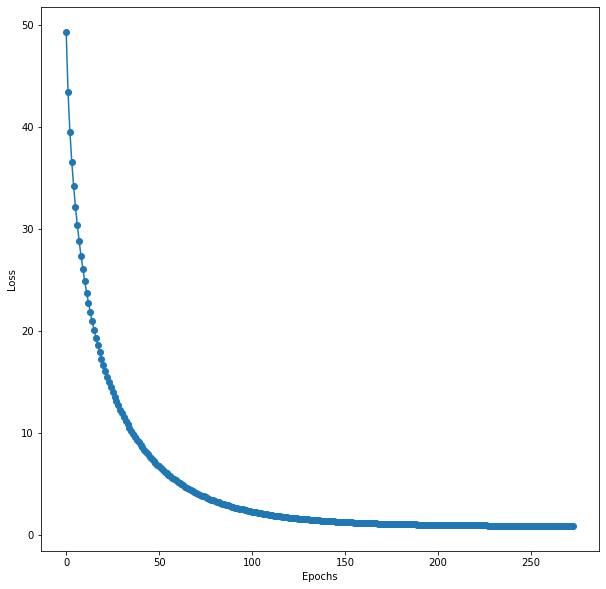

In [43]:
draw(np.arange(len(loss)),loss,'Epochs' ,'Loss' , '')

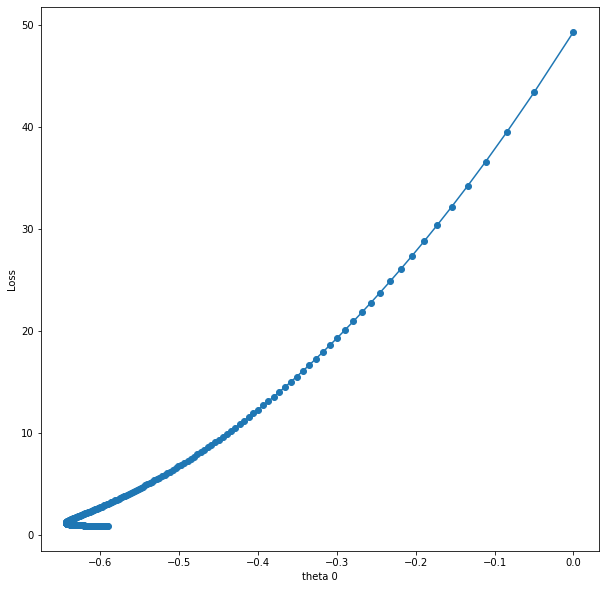

In [44]:
draw(thetas0,loss,'theta 0' ,'Loss' , '')

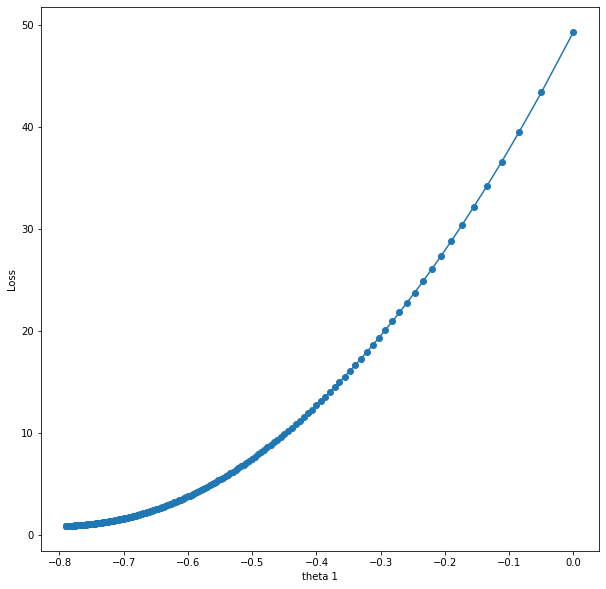

In [45]:
draw(thetas1,loss,'theta 1' ,'Loss' , '')

In [48]:
Xs = X @ np.ones((1,274))

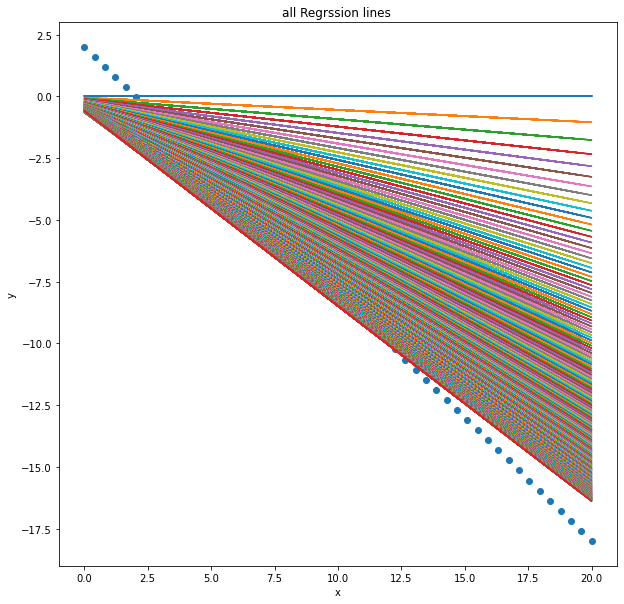

In [49]:
draw(Xs,preds.T,'x' ,'y' , 'all Regrssion lines ' , 0)
plt.scatter(X,y)

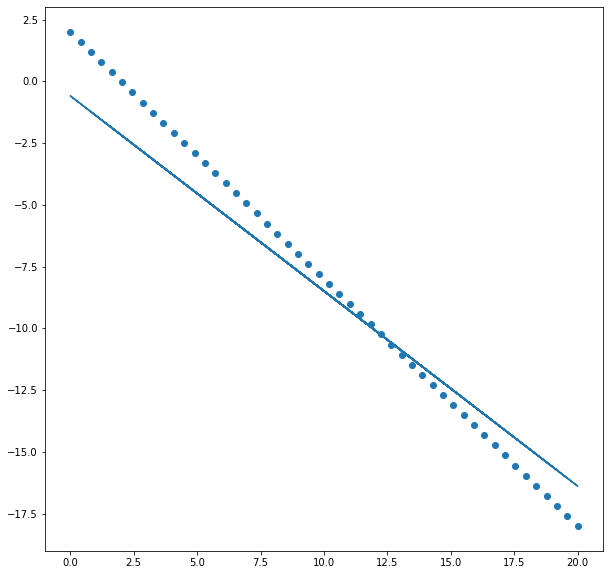

In [50]:
plt.figure(figsize=(10,10))
plt.plot(X,preds[-1])
plt.scatter(X,y)

# 2 - Adagrad mini_batch

In [7]:
matrix = np.concatenate((X,y),axis=1)
matrix.shape

(50, 2)

In [8]:
np.random.shuffle(matrix)

In [9]:
X = matrix[:,0].reshape(-1,1)
X.shape

(50, 1)

In [10]:
y = matrix[:,1].reshape(-1,1)
y.shape

(50, 1)

In [102]:
def lr_minibatch1_adagrad(X , y , lr , eps,  maxnum ,batchsize  ):
    theta_0 = 0
    theta_1 = 0
    loss = np.array([])
    thetas0=np.array([0])
    thetas1=np.array([0])
    hs=np.empty((0,50))
    batch_step = int(len(X)/batchsize)
    vhistory_0 = 0
    vhistory_1 = 0
    prev_theta0 = 0
    prev_theta1 = 0
    
    for i in range(maxnum):
        
        h = thetas0[-1] + thetas1[-1]*X
        hs = np.vstack((hs , h.T))

        print('**********epoch ' , i , '************')

        for j in range(0 ,len(X) , batch_step):
                
            X1 = X[j:j+batch_step]
            y1 = y[j:j+batch_step]

                
        
            h = theta_0 + theta_1*X1
            #print(h.shape)
        
            #hs = np.vstack((hs , h.T))

            error = (h-y1)

            cost = (np.linalg.norm(h-y1))**2/(2*len(h))
            loss = np.append(loss,cost)

            d_theta_0 =  sum(error)/len(error)
            d_theta_1 =  (sum(error*X1)/len(error))
        
        
            gradient_vector = np.array([d_theta_0 ,d_theta_1])

            gradient_vector_norm= np.linalg.norm(gradient_vector)
        
        
            vhistory_0 = vhistory_0 + (d_theta_0)**2
            vhistory_1 = vhistory_1 + (d_theta_1)**2
        
            theta_0 = theta_0 - (lr/(np.sqrt(vhistory_0)+eps))*d_theta_0

            theta_1 = theta_1 - (lr/(np.sqrt(vhistory_1)+eps))*d_theta_1
            
            
            thetas0 = np.append(thetas0 , theta_0)
            thetas1 = np.append(thetas1 , theta_1)
        
        
        
        if (gradient_vector_norm < 0.001):
            break
            
        if (i!=0 and (np.abs(loss[-1] - prev_loss) < 0.0001) ):
            break
            
        
        prev_theta0 = thetas0[-1]
        prev_theta1 = thetas1[-1]
        prev_loss = loss[-1]
        
        #print("h(x): " , h)
        #print("error vector: " ,error )
        print('j = ' , cost)
        
        print("Gradient Vector:" , gradient_vector)
        print("gradient_vector_norm:" , gradient_vector_norm)

        
        print("theta_0_new : " , theta_0)
        print("theta_1_new : " , theta_1)
        
        if(i == maxnum -1 ):
            break
    #print(hs.shape)
        
    return thetas0[:-1],thetas1[:-1],loss,hs,prev_theta0,prev_theta1
    

In [103]:
thetas0 , thetas1 , loss , preds, theta0_opt , theta1_opt = lr_minibatch1_adagrad(X,y,0.05,1e-08  , 300 , 5)

**********epoch  0 ************
j =  41.88915047559975
Gradient Vector: [[  7.86811099]
 [116.54674271]]
gradient_vector_norm: 116.8120302281065
theta_0_new :  [-0.16060997]
theta_1_new :  [-0.16124412]
**********epoch  1 ************
j =  32.07902901779928
Gradient Vector: [[  6.80780782]
 [101.78362917]]
gradient_vector_norm: 102.0110455495927
theta_0_new :  [-0.23680178]
theta_1_new :  [-0.23733494]
**********epoch  2 ************
j =  25.933521932066505
Gradient Vector: [[ 6.05651684]
 [91.32172474]]
gradient_vector_norm: 91.52234047613388
theta_0_new :  [-0.29238967]
theta_1_new :  [-0.29344207]
**********epoch  3 ************
j =  21.521353856659633
Gradient Vector: [[ 5.45878678]
 [82.99712207]]
gradient_vector_norm: 83.17644273066756
theta_0_new :  [-0.33688584]
theta_1_new :  [-0.33882038]
**********epoch  4 ************
j =  18.15108306384554
Gradient Vector: [[ 4.95811779]
 [76.02334421]]
gradient_vector_norm: 76.18485280630377
theta_0_new :  [-0.37409972]
theta_1_new :  [-0

# 3 - Adagrad stochastic

In [106]:
matrix = np.concatenate((X,y),axis=1)
matrix.shape

(50, 2)

In [107]:
np.random.shuffle(matrix)

In [108]:
X = matrix[:,0].reshape(-1,1)
X.shape

(50, 1)

In [109]:
y = matrix[:,1].reshape(-1,1)
y.shape

(50, 1)

In [160]:
def lr_stoch1_adagrad(X , y , lr , eps,  maxnum  ):
    theta_0 = 0
    theta_1 = 0
    loss = np.array([])
    lossepoch = np.array([])
    thetas0=np.array([0])
    thetas1=np.array([0])
    hs=np.empty((0,50))
    vhistory_0 = 0
    vhistory_1 = 0
    prev_theta0 = 0
    prev_theta1 = 0
    
    for i in range(maxnum):
        
        h = thetas0[-1] + thetas1[-1]*X
        hs = np.vstack((hs , h.T))

        print('**********epoch ' , i , '************')

        for j in range(len(X)):
                
        
            h = theta_0 + theta_1*X[j][0]
            #print(h.shape)
        
            #hs = np.vstack((hs , h.T))

            error = (h-y[j,0])

            cost = (np.linalg.norm(h-y[j,0]))**2/2
            loss = np.append(loss,cost)
        
            d_theta_0 =  np.array([error])
            d_theta_1 =  np.array([error*X[j][0]])
            
            gradient_vector = np.array([d_theta_0 ,d_theta_1])

            gradient_vector_norm= np.linalg.norm(gradient_vector)
        
        
            vhistory_0 = vhistory_0 + (d_theta_0[0])**2
            vhistory_1 = vhistory_1 + (d_theta_1[0])**2
        
            theta_0 = theta_0 - (lr/(np.sqrt(vhistory_0)+eps))*d_theta_0[0]

            theta_1 = theta_1 - (lr/(np.sqrt(vhistory_1)+eps))*d_theta_1[0]
            
            
            thetas0 = np.append(thetas0 , theta_0)
            thetas1 = np.append(thetas1 , theta_1)
            
        
        lossepoch = np.append(lossepoch , cost)

        if gradient_vector_norm < 0.001:
            break
            
        if i!=0 and (np.abs(loss[-1] - prev_loss) < 0.0000001) :
            break
        
        
        prev_loss = loss[-1]
        prev_theta0 = thetas0[-1]
        prev_theta1 = thetas1[-1]
        
        #print("h(x): " , h)
        #print("error vector: " ,error )
        print('j = ' , cost)
        
        print("Gradient Vector:" , gradient_vector)
        print("gradient_vector_norm:" , gradient_vector_norm)

        
        print("theta_0_new : " , theta_0)
        print("theta_1_new : " , theta_1)
    
    #print(hs.shape)
        
    return thetas0[:-1],thetas1[:-1],loss,hs,prev_theta0,prev_theta1
    

In [161]:
thetas0 , thetas1 , loss , preds, theta0_opt , theta1_opt = lr_stoch1_adagrad(X,y,0.05,1e-08  , 300)

**********epoch  0 ************
j =  19.904550141911415
Gradient Vector: [[ 6.30944532]
 [92.71021699]]
gradient_vector_norm: 92.9246653735353
theta_0_new :  -0.43852755379353114
theta_1_new :  -0.41109898618508556
**********epoch  1 ************
j =  8.9260108276233
Gradient Vector: [[ 4.22516528]
 [62.08406128]]
gradient_vector_norm: 62.227668174305954
theta_0_new :  -0.5657582113190067
theta_1_new :  -0.5415053772015016
**********epoch  2 ************
j =  4.439178162034739
Gradient Vector: [[ 2.97965708]
 [43.7827163 ]]
gradient_vector_norm: 43.88399028180558
theta_0_new :  -0.63243542131873
theta_1_new :  -0.6204879121367383
**********epoch  3 ************
j =  2.347607780141572
Gradient Vector: [[ 2.16684461]
 [31.83934936]]
gradient_vector_norm: 31.912997088619992
theta_0_new :  -0.6672946671206641
theta_1_new :  -0.6727147409963083
**********epoch  4 ************
j =  1.3078180425859016
Gradient Vector: [[ 1.61729283]
 [23.76430275]]
gradient_vector_norm: 23.819272056049837
the

j =  0.02819332575221328
Gradient Vector: [[0.23745874]
 [3.4891896 ]]
gradient_vector_norm: 3.4972604551911664
theta_0_new :  0.1497607167849681
theta_1_new :  -0.8580827449944249
**********epoch  57 ************
j =  0.02777663097462327
Gradient Vector: [[0.23569739]
 [3.46330866]]
gradient_vector_norm: 3.471319652782027
theta_0_new :  0.16254248241384586
theta_1_new :  -0.8590711042332903
**********epoch  58 ************
j =  0.02736776151289611
Gradient Vector: [[0.23395624]
 [3.43772437]]
gradient_vector_norm: 3.445676182007215
theta_0_new :  0.17520107006523386
theta_1_new :  -0.8600497261107627
**********epoch  59 ************
j =  0.026966511114760602
Gradient Vector: [[0.23223484]
 [3.41243034]]
gradient_vector_norm: 3.420323650395007
theta_0_new :  0.1877385675023756
theta_1_new :  -0.8610187817663095
**********epoch  60 ************
j =  0.026572681271727246
Gradient Vector: [[0.23053278]
 [3.38742044]]
gradient_vector_norm: 3.395255893363821
theta_0_new :  0.200157002772889

j =  0.013407190082966538
Gradient Vector: [[0.16375097]
 [2.4061367 ]]
gradient_vector_norm: 2.4117023462510874
theta_0_new :  0.7019913915556991
theta_1_new :  -0.9006265565340665
**********epoch  111 ************
j =  0.013234583146642399
Gradient Vector: [[0.16269347]
 [2.39059798]]
gradient_vector_norm: 2.3961276787468426
theta_0_new :  0.7101312609592929
theta_1_new :  -0.901251742611594
**********epoch  112 ************
j =  0.013064460096387148
Gradient Vector: [[0.16164443]
 [2.37518339]]
gradient_vector_norm: 2.380677436874027
theta_0_new :  0.718211059058731
theta_1_new :  -0.9018722724950073
**********epoch  113 ************
j =  0.012896777846591807
Gradient Vector: [[0.16060372]
 [2.35989143]]
gradient_vector_norm: 2.3653501077565537
theta_0_new :  0.7262314172902157
theta_1_new :  -0.9024881960460767
**********epoch  114 ************
j =  0.012731494273435007
Gradient Vector: [[0.15957126]
 [2.34472063]]
gradient_vector_norm: 2.3501442083765736
theta_0_new :  0.734192956

j =  0.006808188672161373
Gradient Vector: [[0.11668923]
 [1.71461732]]
gradient_vector_norm: 1.718583405063173
theta_0_new :  1.0685393971720891
theta_1_new :  -0.9287426925530525
**********epoch  165 ************
j =  0.006725444432192677
Gradient Vector: [[0.11597797]
 [1.70416605]]
gradient_vector_norm: 1.708107961392393
theta_0_new :  1.074138035547106
theta_1_new :  -0.9291716409042525
**********epoch  166 ************
j =  0.006643763617220881
Gradient Vector: [[0.11527154]
 [1.69378585]]
gradient_vector_norm: 1.6977037522776177
theta_0_new :  1.0797000838655648
theta_1_new :  -0.9295977734926589
**********epoch  167 ************
j =  0.0065631310970312275
Gradient Vector: [[0.1145699 ]
 [1.68347609]]
gradient_vector_norm: 1.687370150424591
theta_0_new :  1.0852258369329724
theta_1_new :  -0.9300211132430863
**********epoch  168 ************
j =  0.0064835319945330495
Gradient Vector: [[0.11387302]
 [1.67323617]]
gradient_vector_norm: 1.677106536845737
theta_0_new :  1.090715586

j =  0.0036384239310268797
Gradient Vector: [[0.08530444]
 [1.25345303]]
gradient_vector_norm: 1.2563523958373393
theta_0_new :  1.316865574515905
theta_1_new :  -0.9477578703075967
**********epoch  217 ************
j =  0.003595374466018182
Gradient Vector: [[0.08479828]
 [1.2460156 ]]
gradient_vector_norm: 1.2488977621842328
theta_0_new :  1.320889644915995
theta_1_new :  -0.948065847905638
**********epoch  218 ************
j =  0.0035528497000084955
Gradient Vector: [[0.08429531]
 [1.23862497]]
gradient_vector_norm: 1.2414900415268872
theta_0_new :  1.3248889195408975
theta_1_new :  -0.9483719234297096
**********epoch  219 ************
j =  0.003510842867727771
Gradient Vector: [[0.0837955 ]
 [1.23128081]]
gradient_vector_norm: 1.234128889574022
theta_0_new :  1.3288635709313654
theta_1_new :  -0.9486761101948967
**********epoch  220 ************
j =  0.0034693473001684056
Gradient Vector: [[0.08329883]
 [1.22398277]]
gradient_vector_norm: 1.226813965461648
theta_0_new :  1.33281377

j =  0.002063243906006887
Gradient Vector: [[0.06423774]
 [0.94390155]]
gradient_vector_norm: 0.9460848936447253
theta_0_new :  1.4847630585917306
theta_1_new :  -0.9606043076203571
**********epoch  265 ************
j =  0.0020391503780208355
Gradient Vector: [[0.06386157]
 [0.93837416]]
gradient_vector_norm: 0.9405447197584921
theta_0_new :  1.487768008822051
theta_1_new :  -0.96083416992087
**********epoch  266 ************
j =  0.0020153429620166814
Gradient Vector: [[0.06348768]
 [0.93288024]]
gradient_vector_norm: 0.9350380927373203
theta_0_new :  1.490754979058043
theta_1_new :  -0.9610626550808796
**********epoch  267 ************
j =  0.0019918181482950106
Gradient Vector: [[0.06311605]
 [0.92741957]]
gradient_vector_norm: 0.9295647897900847
theta_0_new :  1.4937240849237852
theta_1_new :  -0.9612897719878161
**********epoch  268 ************
j =  0.001968572472866707
Gradient Vector: [[0.06274667]
 [0.92199193]]
gradient_vector_norm: 0.9241245899555309
theta_0_new :  1.4966754

# RMSprop

# 1 - batch

In [146]:
def lr_batch1_RMSprop(X , y , lr , eps,beta,  maxnum ):
    theta_0 = 0
    theta_1 = 0
    loss = np.array([])
    thetas0=np.array([0])
    thetas1=np.array([0])
    hs=np.empty((0,50))
    vhistory_0 = 0
    vhistory_1 = 0

    for i in range(maxnum):


        print('**********iteration ' , i , '************')
        h = theta_0 + theta_1*X
        print("h(x): " , h)
        #print(h.shape)
        
        hs = np.vstack((hs , h.T))

        error = (h-y)
        print("error vector: " ,error )

        cost = (np.linalg.norm(h-y))**2/(2*len(h))
        print('j = ' , cost)
        loss = np.append(loss,cost)

        d_theta_0 =  sum(error)/len(error)
        d_theta_1 =  (sum(error*X)/len(error))
        
        
        gradient_vector = np.array([d_theta_0 ,d_theta_1])
        print("Gradient Vector:" , gradient_vector)

        gradient_vector_norm= np.linalg.norm(gradient_vector)
        print("gradient_vector_norm:" , gradient_vector_norm)
        
        

        if gradient_vector_norm < 0.001:
            break
            
        if i!=0 and (np.abs(loss[-1] - loss[-2]) < 0.0001) :
            break
        
        vhistory_0 = beta*vhistory_0 + (1-beta)*(d_theta_0)**2
        vhistory_1 = beta*vhistory_1 + (1-beta)*(d_theta_1)**2
        
        theta_0 = theta_0 - (lr/(np.sqrt(vhistory_0)+eps))*d_theta_0

        theta_1 = theta_1 - (lr/(np.sqrt(vhistory_1)+eps))*d_theta_1
        
        if(i != maxnum-1):        
            thetas0 = np.append(thetas0 , theta_0)
            thetas1 = np.append(thetas1 , theta_1)

        print("theta_0_new : " , theta_0)
        print("theta_1_new : " , theta_1)
    
    #print(hs.shape)
        
    return thetas0,thetas1,loss,hs,thetas0[-1],thetas1[-1]
    

In [147]:
thetas0 , thetas1 , loss , preds , theta0_opt , theta1_opt = lr_batch1_RMSprop(X , y , 0.05 , 1e-08 , 0.9,  500 )

**********iteration  0 ************
h(x):  [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
error vector:  [[ 1.26530612]
 [14.32653061]
 [ 4.53061224]
 [13.51020408]
 [-1.18367347]
 [ 5.75510204]
 [17.59183673]
 [14.73469388]
 [11.46938776]
 [ 0.04081633]
 [ 6.97959184]
 [16.36734694]
 [18.        ]
 [-2.        ]
 [ 9.42857143]
 [16.7755102 ]
 [-0.36734694]
 [11.06122449]
 [15.14285714]
 [17.18367347]
 [ 0.85714286]
 [ 7.79591837]
 [ 4.93877551]
 [ 0.44897959]
 [13.91836735]
 [ 2.89795918]
 [-0.7755102 ]
 [ 7.3877551 ]
 [10.24489796]
 [15.55102041]
 [15.95918367]
 [ 3.30612245]
 [10.65306122]
 [ 8.20408163]
 [ 9.02040816]
 [ 9.83673469]
 [-1.59183673]
 [ 6.16326531]
 [ 2.48979592]
 [ 4.12244898]
 [ 6.57142857]
 [ 8.6122449 ]
 [ 1.673469

 [-12.54520141]]
error vector:  [[-1.06337135]
 [ 0.32182578]
 [-0.71707207]
 [ 0.23525096]
 [-1.32309581]
 [-0.58720984]
 [ 0.66812506]
 [ 0.36511319]
 [ 0.01881391]
 [-1.19323358]
 [-0.45734761]
 [ 0.53826283]
 [ 0.71141247]
 [-1.40967063]
 [-0.19762314]
 [ 0.58155024]
 [-1.23652099]
 [-0.0244735 ]
 [ 0.4084006 ]
 [ 0.62483765]
 [-1.10665876]
 [-0.37077278]
 [-0.67378466]
 [-1.14994617]
 [ 0.27853837]
 [-0.89022171]
 [-1.2798084 ]
 [-0.41406019]
 [-0.11104832]
 [ 0.45168801]
 [ 0.49497542]
 [-0.8469343 ]
 [-0.06776091]
 [-0.32748537]
 [-0.24091055]
 [-0.15433573]
 [-1.36638322]
 [-0.54392243]
 [-0.93350912]
 [-0.76035948]
 [-0.50063502]
 [-0.28419796]
 [-1.02008394]
 [-0.80364689]
 [ 0.06210132]
 [ 0.10538873]
 [-0.63049725]
 [ 0.19196355]
 [-0.97679653]
 [ 0.14867614]]
j =  0.25605496960759105
Gradient Vector: [[-0.34912908]
 [ 0.18813907]]
gradient_vector_norm: 0.3965947852273089
theta_0_new :  [0.62765757]
theta_1_new :  [-0.89679228]
**********iteration  61 ************
h(x):  [[

# 2 - mini batch

In [152]:
def lr_minibatch1_RMSprop(X , y , lr , eps,beta,  maxnum , batchsize):
    theta_0 = 0
    theta_1 = 0
    loss = np.array([])
    thetas0=np.array([0])
    thetas1=np.array([0])
    hs=np.empty((0,50))
    batch_step = int(len(X)/batchsize)
    vhistory_0 = 0
    vhistory_1 = 0
    prev_theta0 = 0
    prev_theta1 = 0
    
    for i in range(maxnum):

        h = thetas0[-1] + thetas1[-1]*X
        hs = np.vstack((hs , h.T))
        
        print('**********epoch ' , i , '************')
        
        for j in range(0 ,len(X) , batch_step):
            X1 = X[j:j+batch_step]
            y1 = y[j:j+batch_step]

        
        
            h = theta_0 + theta_1*X1
        
            error = (h-y1)

            cost = (np.linalg.norm(h-y1))**2/(2*len(h))
            loss = np.append(loss,cost)

            d_theta_0 =  sum(error)/len(error)
            d_theta_1 =  (sum(error*X1)/len(error))
        
        
            gradient_vector = np.array([d_theta_0 ,d_theta_1])

            gradient_vector_norm= np.linalg.norm(gradient_vector)        
            
            vhistory_0 = beta*vhistory_0 + (1-beta)*(d_theta_0)**2
            vhistory_1 = beta*vhistory_1 + (1-beta)*(d_theta_1)**2
        
            theta_0 = theta_0 - (lr/(np.sqrt(vhistory_0)+eps))*d_theta_0

            theta_1 = theta_1 - (lr/(np.sqrt(vhistory_1)+eps))*d_theta_1

            
            thetas0 = np.append(thetas0 , theta_0)
            thetas1 = np.append(thetas1 , theta_1)
        
        if gradient_vector_norm < 0.001:
            break
            
        if i!=0 and (np.abs(loss[-1] - prev_loss) < 0.0001) :
            break
        
        prev_theta0 = thetas0[-1]
        prev_theta1 = thetas1[-1]
        prev_loss = loss[-1]
        
        #print("h(x): " , h)
        #print("error vector: " ,error )
        print('j = ' , cost)
        
        print("Gradient Vector:" , gradient_vector)
        print("gradient_vector_norm:" , gradient_vector_norm)

        
        print("theta_0_new : " , theta_0)
        print("theta_1_new : " , theta_1)
        
        if(i == maxnum-1):      
            break
    
    #print(hs.shape)
        
    return thetas0[:-1],thetas1[:-1],loss,hs,prev_theta0,prev_theta1
    

In [153]:
thetas0 , thetas1 , loss , preds, theta0_opt , theta1_opt = lr_minibatch1_RMSprop(X,y,0.05,1e-08  ,0.9, 300 , 5)

**********epoch  0 ************
j =  11.117109086456619
Gradient Vector: [[ 3.84840809]
 [49.38390505]]
gradient_vector_norm: 49.5336281976139
theta_0_new :  [-0.42729191]
theta_1_new :  [-0.40702611]
300
**********epoch  1 ************
j =  3.0558688410306982
Gradient Vector: [[ 1.64331678]
 [24.01870698]]
gradient_vector_norm: 24.074857741130675
theta_0_new :  [-0.60021191]
theta_1_new :  [-0.59153798]
300
**********epoch  2 ************
j =  0.9682898375555131
Gradient Vector: [[0.38763171]
 [9.5291038 ]]
gradient_vector_norm: 9.53698472424833
theta_0_new :  [-0.67253653]
theta_1_new :  [-0.69904816]
300
**********epoch  3 ************
j =  0.5913606797862974
Gradient Vector: [[-0.26620385]
 [ 1.91441727]]
gradient_vector_norm: 1.932836773246998
theta_0_new :  [-0.66829867]
theta_1_new :  [-0.75684852]
300
**********epoch  4 ************
j =  0.5592369780071607
Gradient Vector: [[-0.52446839]
 [-1.19909363]]
gradient_vector_norm: 1.3087752441279916
theta_0_new :  [-0.6062053]
theta_

# 3 - stochastic

In [164]:
def lr_stoch1_RMSprop(X , y , lr , eps,beta,  maxnum):
    theta_0 = 0
    theta_1 = 0
    loss = np.array([])
    lossepoch = np.array([])
    thetas0=np.array([0])
    thetas1=np.array([0])
    hs=np.empty((0,50))
    vhistory_0 = 0
    vhistory_1 = 0
    prev_theta0 = 0
    prev_theta1 = 0
    
    for i in range(maxnum):

        h = thetas0[-1] + thetas1[-1]*X
        hs = np.vstack((hs , h.T))
        
        print('**********epoch ' , i , '************')
        
        for j in range(len(X)):
            
            h = theta_0 + theta_1*X[j][0]
        
            error = (h-y[j,0])

            cost = (np.linalg.norm(h-y[j,0]))**2/2
            loss = np.append(loss,cost)
        
            d_theta_0 =  np.array([error])
            d_theta_1 =  np.array([error*X[j][0]])
        
        
            gradient_vector = np.array([d_theta_0 ,d_theta_1])

            gradient_vector_norm= np.linalg.norm(gradient_vector)        
            
            vhistory_0 = beta*vhistory_0 + (1-beta)*(d_theta_0[0])**2
            vhistory_1 = beta*vhistory_1 + (1-beta)*(d_theta_1[0])**2
        
            theta_0 = theta_0 - (lr/(np.sqrt(vhistory_0)+eps))*d_theta_0[0]

            theta_1 = theta_1 - (lr/(np.sqrt(vhistory_1)+eps))*d_theta_1[0]

            thetas0 = np.append(thetas0 , theta_0)
            thetas1 = np.append(thetas1 , theta_1)
            
        
        lossepoch = np.append(lossepoch , cost)
            
        if gradient_vector_norm < 0.0001:
            break
            
        if i!=0 and (np.abs(loss[-1] - prev_loss) < 0.001) :
            break
        
        prev_theta0 = thetas0[-1]
        prev_theta1 = thetas1[-1]
        prev_loss = loss[-1]
        
        #print("h(x): " , h)
        #print("error vector: " ,error )
        print('j = ' , cost)
        
        print("Gradient Vector:" , gradient_vector)
        print("gradient_vector_norm:" , gradient_vector_norm)

        
        print("theta_0_new : " , theta_0)
        print("theta_1_new : " , theta_1)
        
    
    #print(hs.shape)
        
    return thetas0[:-1],thetas1[:-1],loss,hs,prev_theta0,prev_theta1
    

In [165]:
thetas0 , thetas1 , loss , preds, theta0_opt , theta1_opt = lr_stoch1_RMSprop(X,y,0.05,1e-08  ,0.9, 300)

**********epoch  0 ************
j =  0.12345595994917037
Gradient Vector: [[0.49690232]
 [7.30142191]]
gradient_vector_norm: 7.318310857055041
theta_0_new :  -0.298219466149228
theta_1_new :  -0.8376778549896656
**********epoch  1 ************
j =  0.007219697070010204
Gradient Vector: [[0.12016403]
 [1.76567554]]
gradient_vector_norm: 1.7697597362816189
theta_0_new :  0.579309570496767
theta_1_new :  -0.9078229524616607
**********epoch  2 ************
j =  0.02839900035336343
Gradient Vector: [[-0.23832331]
 [-3.50189355]]
gradient_vector_norm: 3.509993798047804
theta_0_new :  1.3512975049543667
theta_1_new :  -0.9404356012312639
**********epoch  3 ************
j =  0.08891382580150392
Gradient Vector: [[-0.42169616]
 [-6.19635174]]
gradient_vector_norm: 6.210684549626391
theta_0_new :  1.8300977570033516
theta_1_new :  -0.9496536738008011
**********epoch  4 ************
j =  0.0696157612377203
Gradient Vector: [[0.3731374 ]
 [5.48283533]]
gradient_vector_norm: 5.495517697101459
theta

# Adam

In [144]:
data2 = np.genfromtxt('MultiVarLR.csv',delimiter=',')

In [145]:
data2

array([[ 73.,  80.,  75., 152.],
       [ 93.,  88.,  93., 185.],
       [ 89.,  91.,  90., 180.],
       [ 96.,  98., 100., 196.],
       [ 73.,  66.,  70., 142.],
       [ 53.,  46.,  55., 101.],
       [ 69.,  74.,  77., 149.],
       [ 47.,  56.,  60., 115.],
       [ 87.,  79.,  90., 175.],
       [ 79.,  70.,  88., 164.],
       [ 69.,  70.,  73., 141.],
       [ 70.,  65.,  74., 141.],
       [ 93.,  95.,  91., 184.],
       [ 79.,  80.,  73., 152.],
       [ 70.,  73.,  78., 148.],
       [ 93.,  89.,  96., 192.],
       [ 78.,  75.,  68., 147.],
       [ 81.,  90.,  93., 183.],
       [ 88.,  92.,  86., 177.],
       [ 78.,  83.,  77., 159.],
       [ 82.,  86.,  90., 177.],
       [ 86.,  82.,  89., 175.],
       [ 78.,  83.,  85., 175.],
       [ 76.,  83.,  71., 149.],
       [ 96.,  93.,  95., 192.]])

In [146]:
X = data2[: , :-1]
X

array([[ 73.,  80.,  75.],
       [ 93.,  88.,  93.],
       [ 89.,  91.,  90.],
       [ 96.,  98., 100.],
       [ 73.,  66.,  70.],
       [ 53.,  46.,  55.],
       [ 69.,  74.,  77.],
       [ 47.,  56.,  60.],
       [ 87.,  79.,  90.],
       [ 79.,  70.,  88.],
       [ 69.,  70.,  73.],
       [ 70.,  65.,  74.],
       [ 93.,  95.,  91.],
       [ 79.,  80.,  73.],
       [ 70.,  73.,  78.],
       [ 93.,  89.,  96.],
       [ 78.,  75.,  68.],
       [ 81.,  90.,  93.],
       [ 88.,  92.,  86.],
       [ 78.,  83.,  77.],
       [ 82.,  86.,  90.],
       [ 86.,  82.,  89.],
       [ 78.,  83.,  85.],
       [ 76.,  83.,  71.],
       [ 96.,  93.,  95.]])

In [147]:
y = data2[: , -1]
y

array([152., 185., 180., 196., 142., 101., 149., 115., 175., 164., 141.,
       141., 184., 152., 148., 192., 147., 183., 177., 159., 177., 175.,
       175., 149., 192.])

In [148]:
ones = np.ones((len(X),1))
X = np.concatenate((ones , X) , axis=1)
X

array([[  1.,  73.,  80.,  75.],
       [  1.,  93.,  88.,  93.],
       [  1.,  89.,  91.,  90.],
       [  1.,  96.,  98., 100.],
       [  1.,  73.,  66.,  70.],
       [  1.,  53.,  46.,  55.],
       [  1.,  69.,  74.,  77.],
       [  1.,  47.,  56.,  60.],
       [  1.,  87.,  79.,  90.],
       [  1.,  79.,  70.,  88.],
       [  1.,  69.,  70.,  73.],
       [  1.,  70.,  65.,  74.],
       [  1.,  93.,  95.,  91.],
       [  1.,  79.,  80.,  73.],
       [  1.,  70.,  73.,  78.],
       [  1.,  93.,  89.,  96.],
       [  1.,  78.,  75.,  68.],
       [  1.,  81.,  90.,  93.],
       [  1.,  88.,  92.,  86.],
       [  1.,  78.,  83.,  77.],
       [  1.,  82.,  86.,  90.],
       [  1.,  86.,  82.,  89.],
       [  1.,  78.,  83.,  85.],
       [  1.,  76.,  83.,  71.],
       [  1.,  96.,  93.,  95.]])

In [149]:
y = y.reshape(-1 , 1)

# Batch multiple variable

In [107]:
def lr_batch1_Adam(X , y , lr , eps,beta1,beta2,  maxnum , stopgrad=0.001 , stopCost=0.001 ):
    
    theta = np.zeros((X.shape[1] , 1))

    
    loss = np.array([])
    thetas=np.zeros((X.shape[1] , 1))
    hs=np.empty((0,len(X))) # number of data points
    vhistory = np.zeros((X.shape[1] , 1))
    mhistory = np.zeros((X.shape[1] , 1))

    for i in range(maxnum):


        print('**********iteration ' , i , '************')
        h = X@theta
        print("h(x): " , h)
        print(h.shape)
        
        hs = np.vstack((hs , h.T))

        error = (h-y)
        print("error vector: " ,error )

        cost = (np.linalg.norm(h-y))**2/(2*len(h))
        print('j = ' , cost)
        loss = np.append(loss,cost)

        d_theta =  (X.T@error)/len(error)

        
        gradient_vector = d_theta
        print("Gradient Vector:" , gradient_vector)
        

        gradient_vector_norm= np.linalg.norm(gradient_vector)
        print("gradient_vector_norm:" , gradient_vector_norm)
        
        

        if gradient_vector_norm < stopgrad:
            break
            
        if i!=0 and (np.abs(loss[-1] - loss[-2]) < stopCost) :
            break
        
        
        
        mhistory = beta1*mhistory + (1-beta1)*d_theta        
        
        vhistory = beta2*vhistory + (1-beta2)*(d_theta)**2
        
        
        vhistory_hat = vhistory/(1-beta2**(i+1))
        
        mhistory_hat = mhistory/(1-beta1**(i+1))
        
        
        theta = theta - (lr/(np.sqrt(vhistory_hat)+eps))*mhistory_hat
        
        
        if(i != maxnum-1):        
            thetas = np.append(thetas , theta , axis=1)

        print("theta_new : " , theta)
        
    print(hs.shape)
        
    return thetas,loss,hs,thetas[: , -1]
    

In [108]:
thetas, loss , preds , theta_opt = lr_batch1_Adam(X , y , 0.05 , 1e-08 , 0.2 ,0.7 ,  500 )

**********iteration  0 ************
h(x):  [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
(50, 1)
error vector:  [[-2.        ]
 [-1.59183673]
 [-1.18367347]
 [-0.7755102 ]
 [-0.36734694]
 [ 0.04081633]
 [ 0.44897959]
 [ 0.85714286]
 [ 1.26530612]
 [ 1.67346939]
 [ 2.08163265]
 [ 2.48979592]
 [ 2.89795918]
 [ 3.30612245]
 [ 3.71428571]
 [ 4.12244898]
 [ 4.53061224]
 [ 4.93877551]
 [ 5.34693878]
 [ 5.75510204]
 [ 6.16326531]
 [ 6.57142857]
 [ 6.97959184]
 [ 7.3877551 ]
 [ 7.79591837]
 [ 8.20408163]
 [ 8.6122449 ]
 [ 9.02040816]
 [ 9.42857143]
 [ 9.83673469]
 [10.24489796]
 [10.65306122]
 [11.06122449]
 [11.46938776]
 [11.87755102]
 [12.28571429]
 [12.69387755]
 [13.10204082]
 [13.51020408]
 [13.91836735]
 [14.32653061]
 [14.73469388]
 [1

In [109]:
r2_score(y ,preds[-1])

0.970302298968233

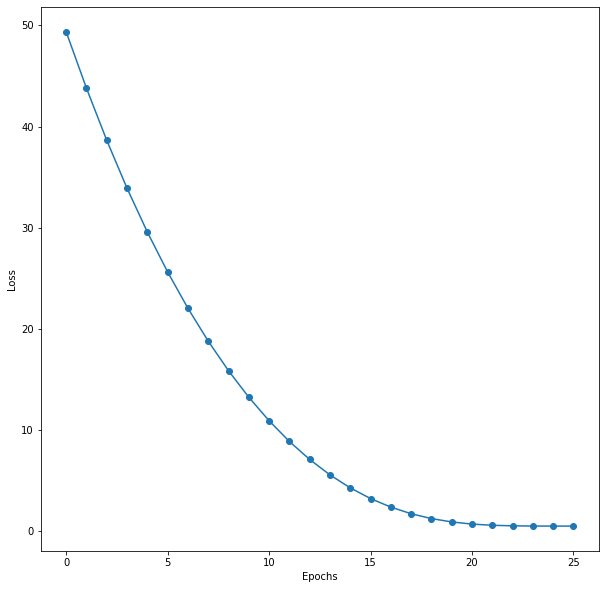

In [110]:
draw(np.arange(len(loss)),loss,'Epochs' ,'Loss' , '')

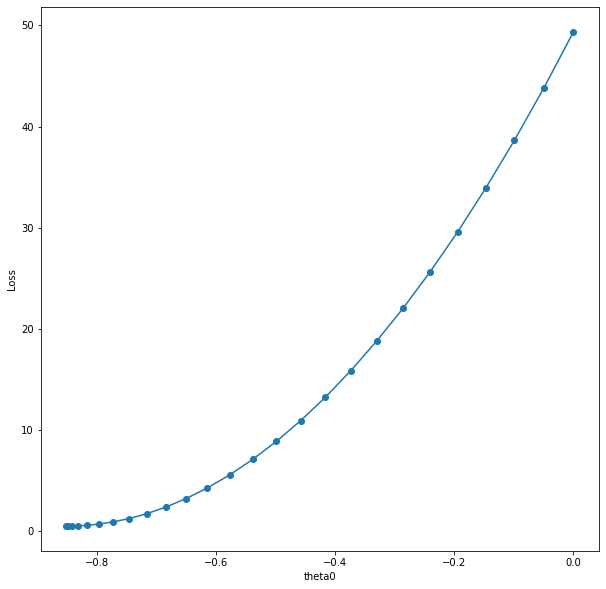

In [111]:
for i in range(len(thetas)):
    
    draw(thetas[i , :],loss,f'theta{i}' ,'Loss' , '')

# mini Batch multiple variable

In [134]:
# matrix = np.concatenate((X,y),axis=1)
# matrix.shape

(25, 5)

In [135]:
# np.random.shuffle(matrix)

In [136]:
# X = matrix[:,:-1].reshape(len(matrix),-1)
# X.shape

(25, 4)

In [137]:
# y = matrix[:,1].reshape(-1,1)
# y.shape

(25, 1)

In [172]:
def lr_minibatch1_Adam(X , y , lr , eps,beta1,beta2,  maxnum  ,stopgrad=0.001 ,stopCost=0.001 , batchsize=5 ):
    
    theta = np.zeros((X.shape[1] , 1))

    
    loss = np.array([])
    thetas=np.zeros((X.shape[1] , 1))
    hs=np.empty((0,len(X))) # number of data points
    
    batch_step = int(len(X)/batchsize)

    vhistory = np.zeros((X.shape[1] , 1))
    mhistory = np.zeros((X.shape[1] , 1))

    for i in range(maxnum):
        
        h = X@thetas[:,-1]
        hs = np.vstack((hs , h.T))
        
        print('**********epoch ' , i , '************')

        
        for j in range(0 ,len(X) , batch_step):

            X1 = X[j:j+batch_step , :]
            y1 = y[j:j+batch_step , :]

            
            
            h = X1@theta
            #print("h(x): " , h)
            #print(h.shape)
        
            #hs = np.vstack((hs , h.T))

            error = (h-y1)

            cost = (np.linalg.norm(h-y1))**2/(2*len(h))
            loss = np.append(loss,cost)

            d_theta =  (X1.T@error)/len(error)

        
            gradient_vector = d_theta        

            gradient_vector_norm= np.linalg.norm(gradient_vector)
        
        
            
            mhistory = beta1*mhistory + (1-beta1)*d_theta        

            vhistory = beta2*vhistory + (1-beta2)*(d_theta)**2


            vhistory_hat = vhistory/(1-beta2**(i+1))

            mhistory_hat = mhistory/(1-beta1**(i+1))


            theta = theta - (lr/(np.sqrt(vhistory_hat)+eps))*mhistory_hat

            thetas = np.append(thetas , theta , axis=1)
            
        if gradient_vector_norm < stopgrad:
            break
            
        if i!=0 and (np.abs(loss[-1] - prev_loss) < stopCost) :
            break
        
        
        prev_theta = thetas[ :, -1]
        prev_loss = loss[-1]
        
        
        #print("h(x): " , h)
        #print("error vector: " ,error )
        print('j = ' , cost)
        
        print("Gradient Vector:" , gradient_vector)
        print("gradient_vector_norm:" , gradient_vector_norm)

        
        print("theta_new : " , theta)
        
        if(i == maxnum -1 ):
            break
            
    #print(hs.shape)
        
    return thetas[:,:-1],loss,hs,prev_theta
    

In [173]:
thetas, loss , preds , theta_opt = lr_minibatch1_Adam(X , y , 0.05 , 1e-08 , 0.2 ,0.7 ,  500 ,batchsize=10)

**********epoch  0 ************
j =  2875.9300288089285
Gradient Vector: [[  -75.84101831]
 [-7280.73775733]
 [-7053.21470241]
 [-7204.89673902]]
gradient_vector_norm: 12436.77083528525
theta_new :  [[0.44759292]
 [0.43945907]
 [0.43996889]
 [0.44008803]]
**********epoch  1 ************
j =  0.004247734155813275
Gradient Vector: [[0.09217086]
 [8.84840302]
 [8.57189042]
 [8.75623215]]
gradient_vector_norm: 15.114616712571628
theta_new :  [[0.6915699 ]
 [0.67435162]
 [0.67422952]
 [0.67850826]]
**********epoch  2 ************
j =  3.9275338728184717
Gradient Vector: [[  2.80268938]
 [269.05818022]
 [260.65011209]
 [266.25549084]]
gradient_vector_norm: 459.5983319681688
theta_new :  [[0.67536286]
 [0.65460957]
 [0.65259192]
 [0.67552427]]
**********epoch  3 ************
j =  3.9007327039299557
Gradient Vector: [[  2.79311035]
 [268.13859327]
 [259.75926223]
 [265.34548292]]
gradient_vector_norm: 458.0275169493214
theta_new :  [[0.68917283]
 [0.64782254]
 [0.64456615]
 [0.68435179]]
*****

**********epoch  77 ************
j =  6.896587133877968
Gradient Vector: [[  3.7139163]
 [356.5359646]
 [345.3942157]
 [352.8220483]]
gradient_vector_norm: 609.0256556453306
theta_new :  [[1.33838245]
 [0.44868315]
 [0.53717585]
 [0.96814794]]
**********epoch  78 ************
j =  6.800167642181322
Gradient Vector: [[  3.68786324]
 [354.03487114]
 [342.97128141]
 [350.3470079 ]]
gradient_vector_norm: 604.7533514845502
theta_new :  [[1.35477602]
 [0.44745606]
 [0.53662539]
 [0.96953109]]
**********epoch  79 ************
j =  6.706980484411955
Gradient Vector: [[  3.66250747]
 [351.60071713]
 [340.61319472]
 [347.93820966]]
gradient_vector_norm: 600.5953916012375
theta_new :  [[1.37122321]
 [0.44623766]
 [0.53608326]
 [0.97091627]]
**********epoch  80 ************
j =  6.616918730303668
Gradient Vector: [[  3.63783417]
 [349.23208048]
 [338.31857797]
 [345.59424631]]
gradient_vector_norm: 596.549346788002
theta_new :  [[1.38771263]
 [0.44502844]
 [0.53554808]
 [0.97230241]]
**********epo

**********epoch  151 ************
j =  3.9953061324161547
Gradient Vector: [[  2.8267671 ]
 [271.36964206]
 [262.88934075]
 [268.54287496]]
gradient_vector_norm: 463.54671222391994
theta_new :  [[2.50728371]
 [0.38472381]
 [0.49464404]
 [1.05711705]]
**********epoch  152 ************
j =  3.9837913017746476
Gradient Vector: [[  2.82269067]
 [270.97830407]
 [262.51023206]
 [268.1556134 ]]
gradient_vector_norm: 462.8782386244185
theta_new :  [[2.52197376]
 [0.38413864]
 [0.49405639]
 [1.05806802]]
**********epoch  153 ************
j =  3.972599554594441
Gradient Vector: [[  2.81872296]
 [270.59740389]
 [262.14123502]
 [267.77868093]]
gradient_vector_norm: 462.22759463839697
theta_new :  [[2.53663271]
 [0.38355815]
 [0.49347069]
 [1.05901226]]
**********epoch  154 ************
j =  3.961723105915965
Gradient Vector: [[  2.81486167]
 [270.22672016]
 [261.78213515]
 [267.41185849]]
gradient_vector_norm: 461.5944021350047
theta_new :  [[2.55126051]
 [0.38298227]
 [0.49288698]
 [1.05994979]]


In [174]:
r2_score(y ,preds[-1])

0.9591062101792753

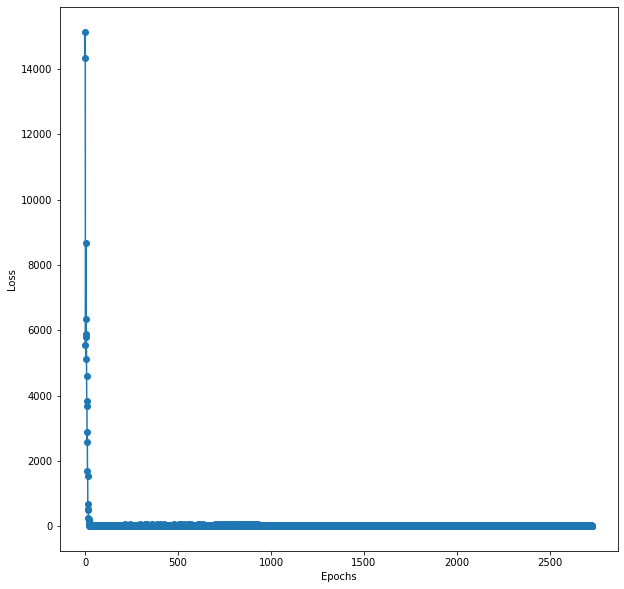

In [175]:
draw(np.arange(len(loss)),loss,'Epochs' ,'Loss' , '')

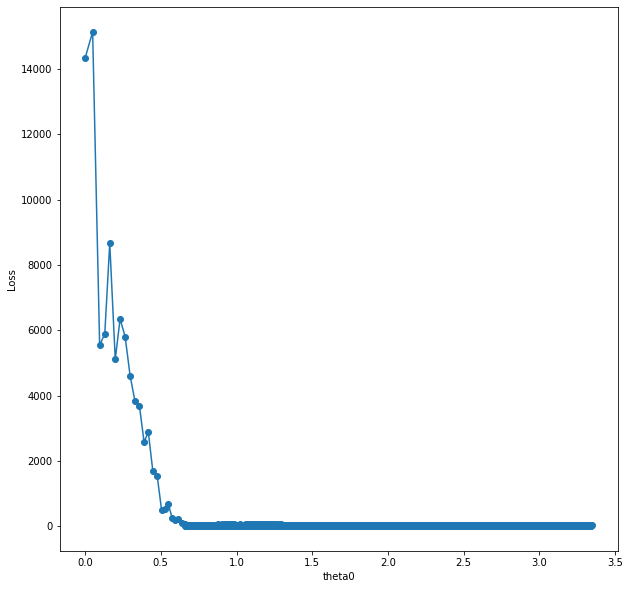

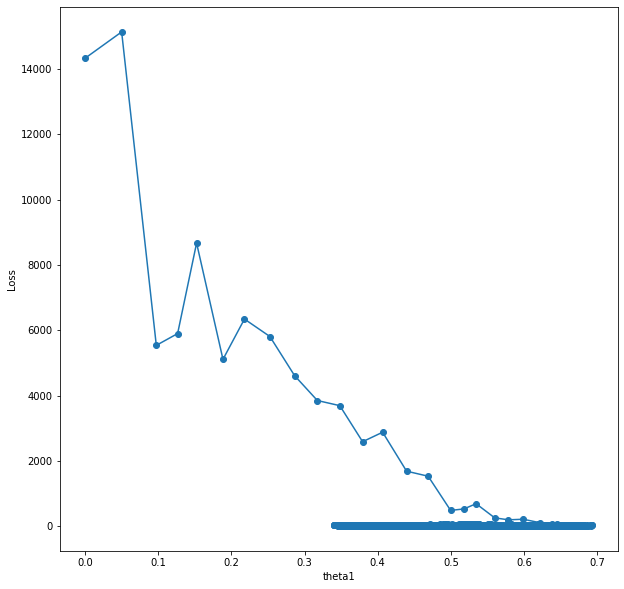

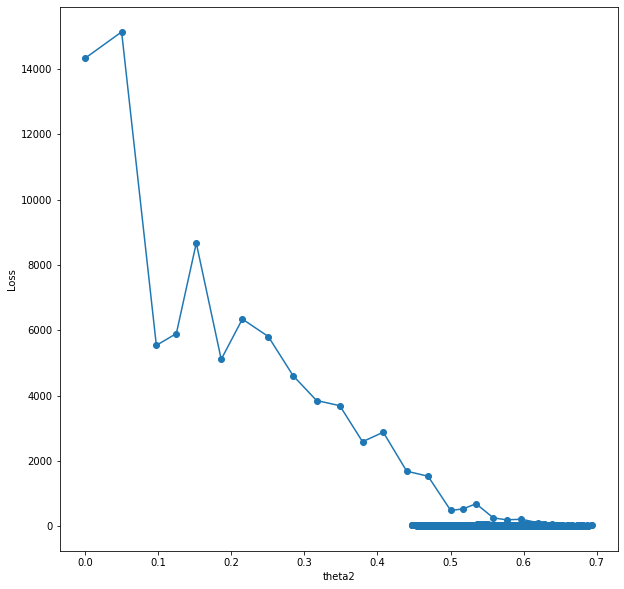

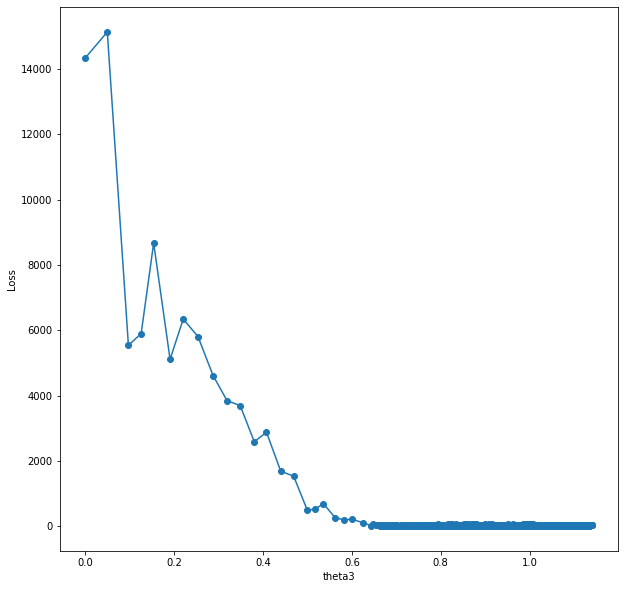

In [176]:
for i in range(len(thetas)):
    
    draw(thetas[i , :],loss,f'theta{i}' ,'Loss' , '')

# stochstic

In [ ]:
ones = np.ones((len(X),1))
X = np.concatenate((ones , X) , axis=1)
X

In [203]:
def lr_stoch1_Adam(X , y , lr , eps,beta1,beta2,  maxnum  ,stopgrad=0.001 ,stopCost=0.001):
    
    theta = np.zeros((X.shape[1] , 1))

    
    loss = np.array([])
    thetas=np.zeros((X.shape[1] , 1))
    hs=np.empty((0,len(X))) # number of data points
    
    vhistory = np.zeros((X.shape[1] , 1))
    mhistory = np.zeros((X.shape[1] , 1))

    for i in range(maxnum):
        
        h = X@thetas[:,-1]
        hs = np.vstack((hs , h.T))
        
        print('**********epoch ' , i , '************')

        
        for j in range(len(X)):
            
            print(X[j].shape)
            print(theta.shape)
            h = X[j].reshape(1,-1)@theta
            #print("h(x): " , h)
            #print(h.shape)
        
            #hs = np.vstack((hs , h.T))

            error = (h-y[j])

            cost = (np.linalg.norm(h-y[j,:]))**2/(2*len(h))
            loss = np.append(loss,cost)

            d_theta =  (X[j].T@error)/len(error)

        
            gradient_vector = d_theta        

            gradient_vector_norm= np.linalg.norm(gradient_vector)
        
        
            
            mhistory = beta1*mhistory + (1-beta1)*d_theta        

            vhistory = beta2*vhistory + (1-beta2)*(d_theta)**2


            vhistory_hat = vhistory/(1-beta2**(i+1))

            mhistory_hat = mhistory/(1-beta1**(i+1))


            theta = theta - (lr/(np.sqrt(vhistory_hat)+eps))*mhistory_hat

            thetas = np.append(thetas , theta , axis=1)
            
        if gradient_vector_norm < stopgrad:
            break
            
        if i!=0 and (np.abs(loss[-1] - prev_loss) < stopCost) :
            break
        
        
        prev_theta = thetas[ :, -1]
        prev_loss = loss[-1]
        
        
        #print("h(x): " , h)
        #print("error vector: " ,error )
        print('j = ' , cost)
        
        print("Gradient Vector:" , gradient_vector)
        print("gradient_vector_norm:" , gradient_vector_norm)

        
        print("theta_new : " , theta)
        
        if(i == maxnum -1 ):
            break
            
    #print(hs.shape)
        
    return thetas[:,:-1],loss,hs,prev_theta
    

In [204]:
thetas, loss , preds , theta_opt = lr_stoch1_Adam(X , y , 0.05 , 1e-08 , 0.2 ,0.7 ,  500 )

**********epoch  0 ************
(4,)
(4, 1)


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 1 is different from 4)

In [ ]:
def Stochastic_Gd(x,y,lr):
    m,n = x.shape
    theta = np.zeros(n)
    J = []
    iterations = 0
    theta_list = []
    gradient_vector = []
    for i in range(3000):
        for j in range(m):
            rand_ind = np.random.randint(0,m)
            err = np.dot(x[rand_ind],theta) - y[rand_ind]
            cost = err**2 * 0.5
            J.append(cost)
            d_theta = x[j] * err
            theta = theta - lr * d_theta
            theta_list.append(theta)
            gradient_vector = np.array(d_theta)
            iterations += 1
    
        norm = np.linalg.norm(gradient_vector)
        print(f'Iteration {i} : Cost ={ J[-1]} : Theta = {theta}')
        print(f'Gradient Vector norm = {norm}')
        if i > 1:
            if norm < 2 or norm < 2 or abs(J[50 * i-1] - J[50 * (i-1) + 50]) < 0.01:
                break
        
    return theta , J , theta_list , iterations

# Rmsprop

# 1- batch

In [160]:
def lr_batch1_RMSProp(X , y , lr , eps,beta,  maxnum , stopgrad=0.001 , stopCost=0.001 ):
    
    theta = np.zeros((X.shape[1] , 1))

    
    loss = np.array([])
    thetas=np.zeros((X.shape[1] , 1))
    hs=np.empty((0,len(X))) # number of data points
    vhistory = np.zeros((X.shape[1] , 1))

    for i in range(maxnum):


        print('**********iteration ' , i , '************')
        h = X@theta
        print("h(x): " , h)
        print(h.shape)
        
        hs = np.vstack((hs , h.T))

        error = (h-y)
        print("error vector: " ,error )

        cost = (np.linalg.norm(h-y))**2/(2*len(h))
        print('j = ' , cost)
        loss = np.append(loss,cost)

        d_theta =  (X.T@error)/len(error)

        
        gradient_vector = d_theta
        print("Gradient Vector:" , gradient_vector)
        

        gradient_vector_norm= np.linalg.norm(gradient_vector)
        print("gradient_vector_norm:" , gradient_vector_norm)
        
        

        if gradient_vector_norm < stopgrad:
            break
            
        if i!=0 and (np.abs(loss[-1] - loss[-2]) < stopCost) :
            break
        
        
                
        vhistory = beta*vhistory + (1-beta)*(d_theta)**2                
        
        theta = theta - (lr/(np.sqrt(vhistory)+eps))*d_theta
        
        
        if(i != maxnum-1):        
            thetas = np.append(thetas , theta , axis=1)

        print("theta_new : " , theta)
        
    #print(hs.shape)
        
    return thetas,loss,hs,thetas[: , -1]
    

In [161]:
thetas, loss , preds , theta_opt = lr_batch1_RMSProp(X , y , 0.05 , 1e-08 , 0.7 ,  500 )

**********iteration  0 ************
h(x):  [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
(25, 1)
error vector:  [[-152.]
 [-185.]
 [-180.]
 [-196.]
 [-142.]
 [-101.]
 [-149.]
 [-115.]
 [-175.]
 [-164.]
 [-141.]
 [-141.]
 [-184.]
 [-152.]
 [-148.]
 [-192.]
 [-147.]
 [-183.]
 [-177.]
 [-159.]
 [-177.]
 [-175.]
 [-175.]
 [-149.]
 [-192.]]
j =  13405.98
Gradient Vector: [[  -162.04]
 [-13075.8 ]
 [-13147.2 ]
 [-13467.08]]
gradient_vector_norm: 22917.5459892197
theta_new :  [[0.09128709]
 [0.09128709]
 [0.09128709]
 [0.09128709]]
**********iteration  1 ************
h(x):  [[20.90474428]
 [25.10395055]
 [24.73880218]
 [26.92969241]
 [19.17028951]
 [14.1494994 ]
 [20.17444753]
 [14.97108324]
 [23.46078288]
 [21.72632811]
 [19.44415079]
 [19.17028951]
 [25.56038602]
 [21.26989265]
 [20.26573463]
 [25.46909892]
 [20.26573463]
 [24.19107962]
 [24.37365381]
 [21.81761521]
 [23.64335707]
 [23.5

In [162]:
r2_score(y ,preds[-1])

0.9134183286819688

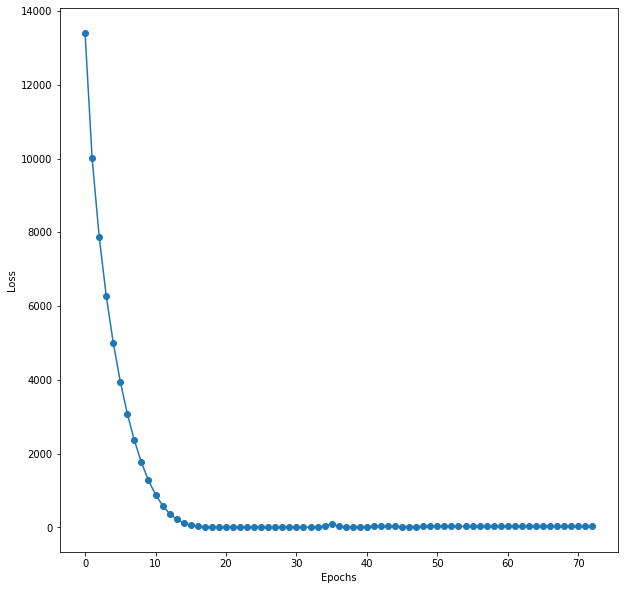

In [164]:
draw(np.arange(len(loss)),loss,'Epochs' ,'Loss' , '')

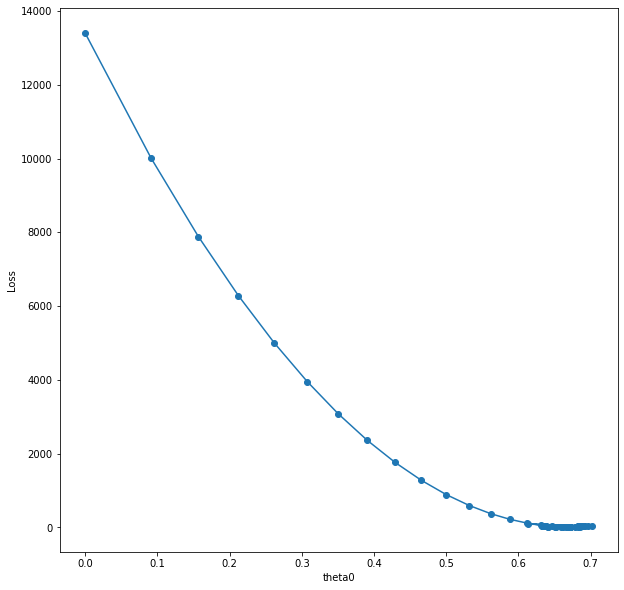

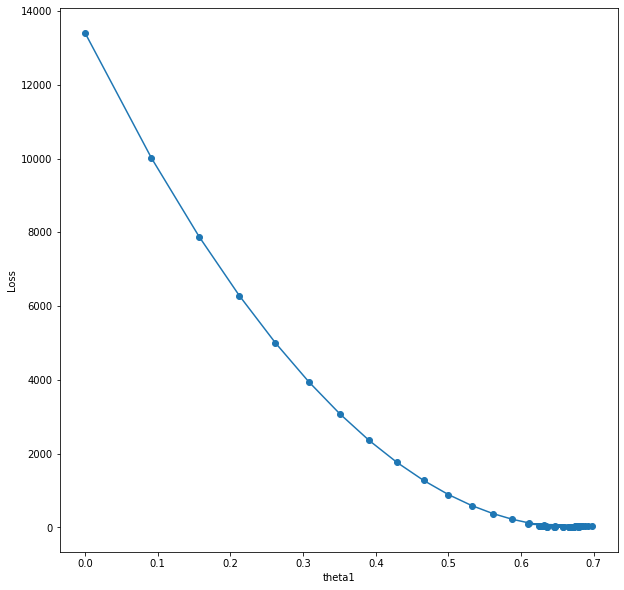

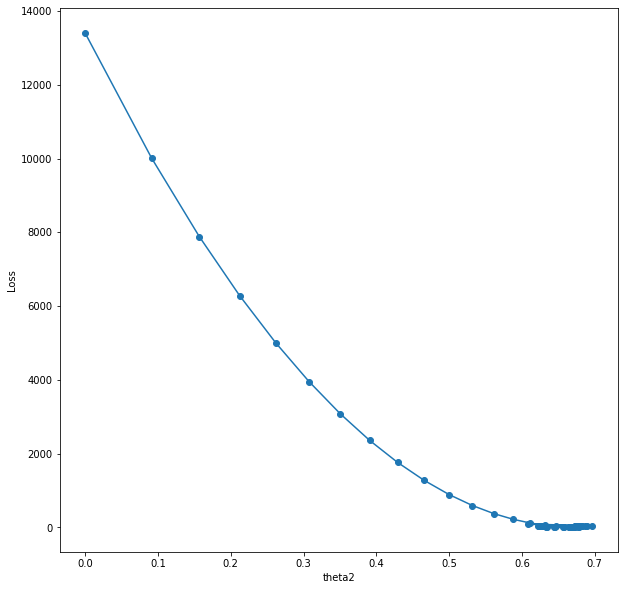

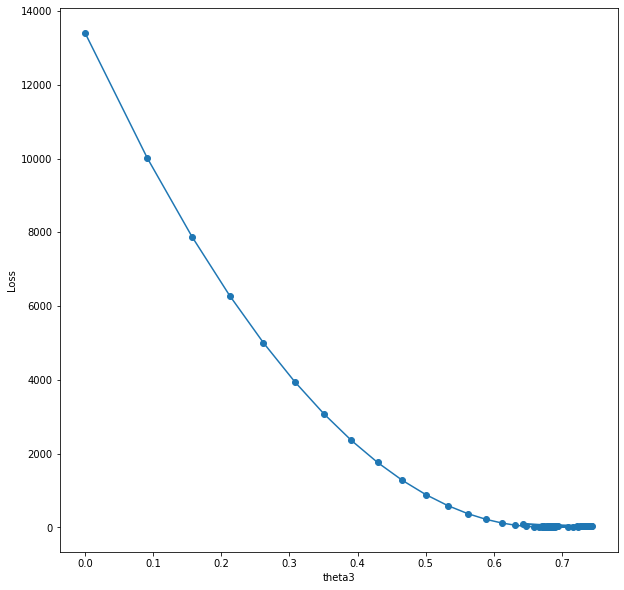

In [165]:
for i in range(len(thetas)):
    
    draw(thetas[i , :],loss,f'theta{i}' ,'Loss' , '')

# 2- Mini_batch

In [185]:
def lr_minibatch1_RMSprop(X , y , lr , eps,beta,  maxnum  ,stopgrad=0.001 ,stopCost=0.001 , batchsize=5 ):
    
    theta = np.zeros((X.shape[1] , 1))

    
    loss = np.array([])
    thetas=np.zeros((X.shape[1] , 1))
    hs=np.empty((0,len(X))) # number of data points
    
    batch_step = int(len(X)/batchsize)

    vhistory = np.zeros((X.shape[1] , 1))

    for i in range(maxnum):
        
        h = X@thetas[:,-1]
        hs = np.vstack((hs , h.T))
        
        print('**********epoch ' , i , '************')

        
        for j in range(0 ,len(X) , batch_step):

            X1 = X[j:j+batch_step , :]
            y1 = y[j:j+batch_step , :]

            
            
            h = X1@theta
            #print("h(x): " , h)
            #print(h.shape)
        
            #hs = np.vstack((hs , h.T))

            error = (h-y1)

            cost = (np.linalg.norm(h-y1))**2/(2*len(h))
            loss = np.append(loss,cost)

            d_theta =  (X1.T@error)/len(error)

        
            gradient_vector = d_theta        

            gradient_vector_norm= np.linalg.norm(gradient_vector)
        
        
        
            vhistory = beta*vhistory + (1-beta)*(d_theta)**2

            theta = theta - (lr/(np.sqrt(vhistory)+eps))*d_theta

            thetas = np.append(thetas , theta , axis=1)
            
        if gradient_vector_norm < stopgrad:
            break
            
        if i!=0 and (np.abs(loss[-1] - prev_loss) < stopCost) :
            break
        
        
        prev_theta = thetas[ :, -1]
        prev_loss = loss[-1]
        
        
        #print("h(x): " , h)
        #print("error vector: " ,error )
        print('j = ' , cost)
        
        print("Gradient Vector:" , gradient_vector)
        print("gradient_vector_norm:" , gradient_vector_norm)

        
        print("theta_new : " , theta)
        
        if(i == maxnum -1 ):
            break
            
    #print(hs.shape)
        
    return thetas[:,:-1],loss,hs,prev_theta
    

In [186]:
thetas, loss , preds , theta_opt = lr_minibatch1_RMSprop(X , y , 0.05 , 1e-08 , 0.7 ,  500 , batchsize=10  )

**********epoch  0 ************
j =  607.6844034310727
Gradient Vector: [[  -34.86214002]
 [-3346.76544204]
 [-3242.17902198]
 [-3311.90330202]]
gradient_vector_norm: 5716.8595037249215
theta_new :  [[0.59808941]
 [0.58621184]
 [0.58696297]
 [0.58738417]]
**********epoch  1 ************
j =  0.036220519233330736
Gradient Vector: [[ 0.26914873]
 [25.83827801]
 [25.03083182]
 [25.56912928]]
gradient_vector_norm: 44.13628853230631
theta_new :  [[0.68304876]
 [0.6694165 ]
 [0.66682374]
 [0.68056321]]
**********epoch  2 ************
j =  3.737633122249254
Gradient Vector: [[  -2.73409331]
 [-262.47295805]
 [-254.27067811]
 [-259.73886474]]
gradient_vector_norm: 448.3496231522999
theta_new :  [[0.70889472]
 [0.68282225]
 [0.68057193]
 [0.70873546]]
**********epoch  3 ************
j =  9.548768610995609
Gradient Vector: [[  -4.37007291]
 [-419.52699918]
 [-406.41678045]
 [-415.15692627]]
gradient_vector_norm: 716.6253368647845
theta_new :  [[0.70586086]
 [0.69038616]
 [0.69258155]
 [0.7328619

j =  27.3990711759306
Gradient Vector: [[  7.40257674]
 [710.64736678]
 [688.43963657]
 [703.24479005]]
gradient_vector_norm: 1213.90973551739
theta_new :  [[0.14339524]
 [0.37734265]
 [0.6077318 ]
 [0.93589363]]
**********epoch  79 ************
j =  0.9273717835548247
Gradient Vector: [[  -1.3618897 ]
 [-130.74141163]
 [-126.65574251]
 [-129.37952192]]
gradient_vector_norm: 223.32915005244072
theta_new :  [[0.18931594]
 [0.42349793]
 [0.64645792]
 [0.98125526]]
**********epoch  80 ************
j =  19.012796021583476
Gradient Vector: [[  6.16648944]
 [591.98298647]
 [573.48351814]
 [585.81649703]]
gradient_vector_norm: 1011.2102628201528
theta_new :  [[0.14000247]
 [0.38497023]
 [0.61711397]
 [0.94370543]]
**********epoch  81 ************
j =  1.1609285606636677
Gradient Vector: [[  -1.52376413]
 [-146.2813564 ]
 [-141.71006401]
 [-144.75759227]]
gradient_vector_norm: 249.874087991559
theta_new :  [[0.17759243]
 [0.42452156]
 [0.64822953]
 [0.9817954 ]]
**********epoch  82 ***********

In [179]:
r2_score(y ,preds[-1])

0.952007903063735

# Adagrad

# 1-batch

In [170]:
def lr_batch1_Adagrad(X , y , lr , eps,  maxnum , stopgrad=0.001 , stopCost=0.001 ):
    
    theta = np.zeros((X.shape[1] , 1))

    
    loss = np.array([])
    thetas=np.zeros((X.shape[1] , 1))
    hs=np.empty((0,len(X))) # number of data points
    vhistory = np.zeros((X.shape[1] , 1))

    for i in range(maxnum):


        print('**********iteration ' , i , '************')
        h = X@theta
        print("h(x): " , h)
        print(h.shape)
        
        hs = np.vstack((hs , h.T))

        error = (h-y)
        print("error vector: " ,error )

        cost = (np.linalg.norm(h-y))**2/(2*len(h))
        print('j = ' , cost)
        loss = np.append(loss,cost)

        d_theta =  (X.T@error)/len(error)

        
        gradient_vector = d_theta
        print("Gradient Vector:" , gradient_vector)
        

        gradient_vector_norm= np.linalg.norm(gradient_vector)
        print("gradient_vector_norm:" , gradient_vector_norm)
        
        

        if gradient_vector_norm < stopgrad:
            break
            
        if i!=0 and (np.abs(loss[-1] - loss[-2]) < stopCost) :
            break
        
        
                
        vhistory = vhistory + (d_theta)**2                
        
        theta = theta - (lr/(np.sqrt(vhistory)+eps))*d_theta
        
        
        if(i != maxnum-1):        
            thetas = np.append(thetas , theta , axis=1)

        print("theta_new : " , theta)
        
    #print(hs.shape)
        
    return thetas,loss,hs,thetas[: , -1]
    

In [171]:
thetas, loss , preds , theta_opt = lr_batch1_Adagrad(X , y , 0.05 , 1e-08  ,  500 )

**********iteration  0 ************
h(x):  [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
(25, 1)
error vector:  [[-152.]
 [-185.]
 [-180.]
 [-196.]
 [-142.]
 [-101.]
 [-149.]
 [-115.]
 [-175.]
 [-164.]
 [-141.]
 [-141.]
 [-184.]
 [-152.]
 [-148.]
 [-192.]
 [-147.]
 [-183.]
 [-177.]
 [-159.]
 [-177.]
 [-175.]
 [-175.]
 [-149.]
 [-192.]]
j =  13405.98
Gradient Vector: [[  -162.04]
 [-13075.8 ]
 [-13147.2 ]
 [-13467.08]]
gradient_vector_norm: 22917.5459892197
theta_new :  [[0.05]
 [0.05]
 [0.05]
 [0.05]]
**********iteration  1 ************
h(x):  [[11.45]
 [13.75]
 [13.55]
 [14.75]
 [10.5 ]
 [ 7.75]
 [11.05]
 [ 8.2 ]
 [12.85]
 [11.9 ]
 [10.65]
 [10.5 ]
 [14.  ]
 [11.65]
 [11.1 ]
 [13.95]
 [11.1 ]
 [13.25]
 [13.35]
 [11.95]
 [12.95]
 [12.9 ]
 [12.35]
 [11.55]
 [14.25]]
(25, 1)
error vector:  [[-140.55]
 [-171.25]
 [-166.45]
 [-181.25]
 [-131.5 ]
 [ -93.25]
 [-137.95]
 [-106.8 ]
 [-162.1

error vector:  [[-31.40731272]
 [-40.18246375]
 [-37.28945723]
 [-40.65026163]
 [-31.4123436 ]
 [-19.37472238]
 [-32.61871707]
 [-28.63475049]
 [-39.66044988]
 [-38.66464578]
 [-28.83196001]
 [-30.41112256]
 [-36.55060801]
 [-29.30187013]
 [-31.09188975]
 [-45.07552647]
 [-30.09493533]
 [-43.44760706]
 [-36.39672436]
 [-33.14163618]
 [-40.60752521]
 [-39.13428227]
 [-44.92713004]
 [-27.35553883]
 [-41.91681531]]
j =  636.5573184005908
Gradient Vector: [[  -35.12721184]
 [-2833.21494373]
 [-2848.22728194]
 [-2928.09290711]]
gradient_vector_norm: 4971.364758355407
theta_new :  [[0.52934459]
 [0.52930129]
 [0.5292869 ]
 [0.52961039]]
**********iteration  62 ************
h(x):  [[121.23206987]
 [145.5853779 ]
 [143.46720225]
 [156.17342347]
 [111.17400137]
 [ 82.05808174]
 [116.99836409]
 [ 86.8231949 ]
 [136.0571569 ]
 [125.9999437 ]
 [112.76277495]
 [111.17525214]
 [148.2311654 ]
 [123.34865685]
 [117.52798888]
 [147.70349596]
 [117.52486913]
 [140.29233618]
 [141.3487463 ]
 [126.5256578

theta_new :  [[0.61777203]
 [0.61766669]
 [0.61763168]
 [0.61841956]]
**********iteration  113 ************
h(x):  [[141.49944161]
 [169.92538088]
 [167.45235049]
 [182.28363465]
 [129.7605003 ]
 [ 95.77823953]
 [136.55982388]
 [101.34065398]
 [158.80543694]
 [147.06857917]
 [131.61561893]
 [129.76354677]
 [173.01196353]
 [143.96860264]
 [137.17827844]
 [172.39827122]
 [137.17067977]
 [163.74864395]
 [164.97863725]
 [147.67750922]
 [160.04052525]
 [159.42224573]
 [152.62486567]
 [142.7316585 ]
 [176.10337846]]
(25, 1)
error vector:  [[-10.50055839]
 [-15.07461912]
 [-12.54764951]
 [-13.71636535]
 [-12.2394997 ]
 [ -5.22176047]
 [-12.44017612]
 [-13.65934602]
 [-16.19456306]
 [-16.93142083]
 [ -9.38438107]
 [-11.23645323]
 [-10.98803647]
 [ -8.03139736]
 [-10.82172156]
 [-19.60172878]
 [ -9.82932023]
 [-19.25135605]
 [-12.02136275]
 [-11.32249078]
 [-16.95947475]
 [-15.57775427]
 [-22.37513433]
 [ -6.2683415 ]
 [-15.89662154]]
j =  94.28417464387596
Gradient Vector: [[  -13.12366133]
 [

theta_new :  [[0.65534017]
 [0.65514197]
 [0.65507614]
 [0.65656074]]
**********iteration  176 ************
h(x):  [[150.12885022]
 [180.29039192]
 [177.66537027]
 [193.40250438]
 [137.67498055]
 [101.62220736]
 [144.89094697]
 [107.52492065]
 [168.49417263]
 [156.04423015]
 [139.64439946]
 [137.68072145]
 [183.56280344]
 [152.74658055]
 [145.54757353]
 [182.91515026]
 [145.53325419]
 [173.7388406 ]
 [175.0390615 ]
 [156.68290994]
 [169.80399579]
 [169.14769836]
 [161.93539583]
 [151.4332616 ]
 [186.84431999]]
(25, 1)
error vector:  [[ -1.87114978]
 [ -4.70960808]
 [ -2.33462973]
 [ -2.59749562]
 [ -4.32501945]
 [  0.62220736]
 [ -4.10905303]
 [ -7.47507935]
 [ -6.50582737]
 [ -7.95576985]
 [ -1.35560054]
 [ -3.31927855]
 [ -0.43719656]
 [  0.74658055]
 [ -2.45242647]
 [ -9.08484974]
 [ -1.46674581]
 [ -9.2611594 ]
 [ -1.9609385 ]
 [ -2.31709006]
 [ -7.19600421]
 [ -5.85230164]
 [-13.06460417]
 [  2.4332616 ]
 [ -5.15568001]]
j =  14.477161745272358
Gradient Vector: [[  -4.04021834]
 [

h(x):  [[152.9597952 ]
 [183.69265905]
 [181.01665456]
 [197.05225827]
 [140.2723205 ]
 [103.54212814]
 [147.62686802]
 [109.5575066 ]
 [171.67638022]
 [158.99508094]
 [142.2803518 ]
 [140.28134548]
 [187.02373034]
 [155.62433789]
 [148.29645255]
 [186.36825079]
 [148.27394171]
 [177.0199437 ]
 [178.338626  ]
 [159.63645551]
 [173.01015972]
 [172.34109111]
 [164.99230627]
 [154.28506565]
 [190.36911299]]
(25, 1)
error vector:  [[  0.9597952 ]
 [ -1.30734095]
 [  1.01665456]
 [  1.05225827]
 [ -1.7276795 ]
 [  2.54212814]
 [ -1.37313198]
 [ -5.4424934 ]
 [ -3.32361978]
 [ -5.00491906]
 [  1.2803518 ]
 [ -0.71865452]
 [  3.02373034]
 [  3.62433789]
 [  0.29645255]
 [ -5.63174921]
 [  1.27394171]
 [ -5.9800563 ]
 [  1.338626  ]
 [  0.63645551]
 [ -3.98984028]
 [ -2.65890889]
 [-10.00769373]
 [  5.28506565]
 [ -1.63088701]]
j =  6.627492879622803
Gradient Vector: [[ -1.05868708]
 [-83.71336   ]
 [-83.59899044]
 [-98.99207603]]
gradient_vector_norm: 154.26363726108565
theta_new :  [[0.66764

gradient_vector_norm: 50.767284824445355
theta_new :  [[0.6705138 ]
 [0.67010251]
 [0.66996613]
 [0.67305821]]
**********iteration  309 ************
h(x):  [[153.66465332]
 [184.54148036]
 [181.85179408]
 [197.96285669]
 [140.91983642]
 [104.02259045]
 [148.31056294]
 [110.0669278 ]
 [172.4719955 ]
 [159.73536384]
 [142.93846556]
 [140.93179563]
 [187.88512685]
 [156.33915193]
 [148.98375753]
 [187.23062113]
 [148.9539277 ]
 [177.84018254]
 [179.15942485]
 [160.37118068]
 [173.81124588]
 [173.13873317]
 [165.75564639]
 [154.99262638]
 [191.24773496]]
(25, 1)
error vector:  [[ 1.66465332]
 [-0.45851964]
 [ 1.85179408]
 [ 1.96285669]
 [-1.08016358]
 [ 3.02259045]
 [-0.68943706]
 [-4.9330722 ]
 [-2.5280045 ]
 [-4.26463616]
 [ 1.93846556]
 [-0.06820437]
 [ 3.88512685]
 [ 4.33915193]
 [ 0.98375753]
 [-4.76937887]
 [ 1.9539277 ]
 [-5.15981746]
 [ 2.15942485]
 [ 1.37118068]
 [-3.18875412]
 [-1.86126683]
 [-9.24435361]
 [ 5.99262638]
 [-0.75226504]]
j =  6.0781367710052185
Gradient Vector: [[ 

# 2-mini_batch

In [183]:
def lr_minibatch1_Adagrad(X , y , lr , eps,  maxnum  ,stopgrad=0.001 ,stopCost=0.001 , batchsize=5 ):
    
    theta = np.zeros((X.shape[1] , 1))

    
    loss = np.array([])
    thetas=np.zeros((X.shape[1] , 1))
    hs=np.empty((0,len(X))) # number of data points
    
    batch_step = int(len(X)/batchsize)

    vhistory = np.zeros((X.shape[1] , 1))

    for i in range(maxnum):
        
        h = X@thetas[:,-1]
        hs = np.vstack((hs , h.T))
        
        print('**********epoch ' , i , '************')

        
        for j in range(0 ,len(X) , batch_step):

            X1 = X[j:j+batch_step , :]
            y1 = y[j:j+batch_step , :]

            
            
            h = X1@theta
            #print("h(x): " , h)
            #print(h.shape)
        
            #hs = np.vstack((hs , h.T))

            error = (h-y1)

            cost = (np.linalg.norm(h-y1))**2/(2*len(h))
            loss = np.append(loss,cost)

            d_theta =  (X1.T@error)/len(error)

        
            gradient_vector = d_theta        

            gradient_vector_norm= np.linalg.norm(gradient_vector)
        
        
        
            vhistory = vhistory + (d_theta)**2

            theta = theta - (lr/(np.sqrt(vhistory)+eps))*d_theta

            thetas = np.append(thetas , theta , axis=1)
            
        if gradient_vector_norm < stopgrad:
            break
            
        if i!=0 and (np.abs(loss[-1] - prev_loss) < stopCost) :
            break
        
        
        prev_theta = thetas[ :, -1]
        prev_loss = loss[-1]
        
        
        #print("h(x): " , h)
        #print("error vector: " ,error )
        print('j = ' , cost)
        
        print("Gradient Vector:" , gradient_vector)
        print("gradient_vector_norm:" , gradient_vector_norm)

        
        print("theta_new : " , theta)
        
        if(i == maxnum -1 ):
            break
            
    #print(hs.shape)
        
    return thetas[:,:-1],loss,hs,prev_theta
    

In [184]:
thetas, loss , preds , theta_opt = lr_minibatch1_Adagrad(X , y , 0.05 , 1e-08  ,  500 , batchsize=10 )

**********epoch  0 ************
j =  7508.606675660632
Gradient Vector: [[  -122.5447402 ]
 [-11764.29505945]
 [-11396.66083884]
 [-11641.75031925]]
gradient_vector_norm: 20095.469246334607
theta_new :  [[0.26577709]
 [0.25842924]
 [0.25811107]
 [0.25937525]]
**********epoch  1 ************
j =  4063.516089014684
Gradient Vector: [[  -90.15005368]
 [-8654.40515303]
 [-8383.95499199]
 [-8564.25509935]]
gradient_vector_norm: 14783.23450058842
theta_new :  [[0.37544562]
 [0.36612546]
 [0.3658251 ]
 [0.36728815]]
**********epoch  2 ************
j =  2381.355545038133
Gradient Vector: [[  -69.01239809]
 [-6625.1902166 ]
 [-6418.15302233]
 [-6556.17781851]]
gradient_vector_norm: 11316.98121953204
theta_new :  [[0.44813644]
 [0.43754074]
 [0.43725284]
 [0.43888183]]
**********epoch  3 ************
j =  1443.8485381666442
Gradient Vector: [[  -53.73729688]
 [-5158.78050081]
 [-4997.56861016]
 [-5105.04320392]]
gradient_vector_norm: 8812.097484689923
theta_new :  [[0.50096793]
 [0.48944996]
 [0

# bfgs

In [ ]:
f_firstXy = lambda xy: np.array([float(2*xy[0]) , float(2*xy[1])]).reshape(-1,1)
xtb = np.array([10,10]).reshape(-1,1)
xtn = np.array([9,9]).reshape(-1,1)


In [ ]:
import numpy as np

def BFGS(xtb, xtn, eps, lr, f_firstXy4, maxnum):
    i = 0
    
    identity = np.eye(len(xtb))
    Binv = identity
    
    for i in range(maxnum):
        print("Found solution after", i, "iterations")
        
        deltax = xtn - xtb
        
        xtb_g = f_firstXy4(xtb)
        xtn_g = f_firstXy4(xtn)
        
        y = xtn_g - xtb_g
        
        print("xn_1 =", xtb)
        print("xn =", xtn)
        print("dfxn_1 =", xtb_g)
        print("dfxn =", xtn_g)
        print("gradientnorm", np.linalg.norm(xtn_g))
        
        if np.linalg.norm(xtn_g) < eps:
            break
        
        term1 = identity - np.outer(deltax, y) / np.dot(y, deltax)
        term2 = identity - np.outer(y, deltax) / np.dot(y, deltax)
        term3 = np.outer(deltax, deltax) / np.dot(y, deltax)
        
        Binv = term1 @ Binv @ term2 + term3
        
        xtb = xtn
        xtn = xtn - lr * Binv @ xtn_g
        
        print("Binv", Binv)
        print("************************************************************************************************************")
    
    print("************************************************************************************************************")
    print("Found solution after", i + 1, "iterations")
    print("xmin =", xtn)
    print("Gradient =", f_firstXy4(xtn))

# Example usage
# Assuming xtb and xtn are initial and updated parameter vectors
# eps = tolerance for convergence
# lr = learning rate
# f_firstXy4 = function to compute the gradient
# maxnum = maximum number of iterations
# BFGS(xtb, xtn, eps, lr, f_firstXy4, maxnum)


In [ ]:
BFGS(np.array([[10],[10]]) , np.array([[9],[9]]) , 0.001 , 1 , f_firstXy , 5)